In [42]:
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer #%timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [43]:
df = pd.read_csv("C:/Projects/prediction_frozen/data/01_raw/grand_est.csv", sep = ";")

In [44]:
threshold = 5
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage_above_threshold = missing_percentage[missing_percentage > threshold]
print("Colonnes avec un pourcentage de valeurs manquantes supérieur à {}% :".format(threshold))
print(missing_percentage_above_threshold)

Colonnes avec un pourcentage de valeurs manquantes supérieur à 5% :
Temps passé 1                                                 80.282023
Temps passé 2                                                 80.486984
Nebulosité totale                                             37.720911
Nébulosité  des nuages de l' étage inférieur                  24.428068
Hauteur de la base des nuages de l'étage inférieur            34.093398
Type des nuages de l'étage inférieur                          80.659794
Type des nuages de l'étage moyen                              83.039455
Type des nuages de l'étage supérieur                          84.290824
Niveau barométrique                                          100.000000
Géopotentiel                                                 100.000000
Variation de pression en 24 heures                            32.933458
Température minimale sur 12 heures                            75.306688
Température minimale sur 24 heures                           100.000

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199062 entries, 0 to 199061
Data columns (total 82 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   ID OMM station                                             199062 non-null  int64  
 1   Date                                                       199062 non-null  object 
 2   Pression au niveau mer                                     199001 non-null  float64
 3   Variation de pression en 3 heures                          199000 non-null  float64
 4   Type de tendance barométrique                              199001 non-null  float64
 5   Direction du vent moyen 10 mn                              198806 non-null  float64
 6   Vitesse du vent moyen 10 mn                                198808 non-null  float64
 7   Température                                                199008 non-null  float64

In [21]:
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned = df_cleaned.dropna(subset=["Temps présent.1"])

In [22]:
df_cleaned[["Latitude", "Longitude"]]

,Latitude,Longitude
1,48.324667,4.020000
2,48.324667,4.020000
3,48.581000,5.959833
4,48.324667,4.020000
5,48.549500,7.640333
...,...,...
199057,48.581000,5.959833
199058,47.614333,7.510000
199059,49.209667,4.155333
199060,49.209667,4.155333


In [23]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], utc=True)
df_cleaned['date'] = df_cleaned['Date'].dt.strftime('%Y-%m-%d')
df_cleaned['annee'] = df_cleaned['Date'].dt.strftime('%Y')
df_cleaned['mois'] = df_cleaned['Date'].dt.strftime('%m')
df_cleaned["jour"] = df_cleaned['Date'].dt.strftime('%d')
df_cleaned['heure'] = df_cleaned['Date'].dt.strftime('%H')
df_cleaned['minute'] = df_cleaned['Date'].dt.strftime('%M')

In [24]:
df_cleaned.sort_values(by = 'Date', ascending=False)

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,department (code),region (name),region (code),mois_de_l_annee,date,annee,mois,jour,heure,minute
153523,7168,2024-02-27 18:00:00+00:00,101840.0,250.0,1.0,350.0,5.4,279.95,277.75,86.0,...,10,Grand Est,44,2,2024-02-27,2024,02,27,18,00
116163,7072,2024-02-27 18:00:00+00:00,101910.0,230.0,3.0,10.0,3.4,278.85,277.05,88.0,...,51,Grand Est,44,2,2024-02-27,2024,02,27,18,00
179127,7299,2024-02-27 18:00:00+00:00,101380.0,220.0,3.0,350.0,5.1,281.55,278.45,81.0,...,68,Grand Est,44,2,2024-02-27,2024,02,27,18,00
153524,7181,2024-02-27 18:00:00+00:00,101630.0,210.0,3.0,360.0,2.9,279.15,275.65,78.0,...,54,Grand Est,44,2,2024-02-27,2024,02,27,18,00
161468,7190,2024-02-27 18:00:00+00:00,101500.0,140.0,3.0,360.0,2.1,282.05,278.05,76.0,...,67,Grand Est,44,2,2024-02-27,2024,02,27,18,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58619,7190,2010-01-01 06:00:00+00:00,99150.0,0.0,5.0,0.0,0.0,275.75,275.45,98.0,...,67,Grand Est,44,1,2010-01-01,2010,01,01,06,00
20234,7299,2010-01-01 03:00:00+00:00,99180.0,-130.0,6.0,180.0,1.0,273.35,273.35,100.0,...,68,Grand Est,44,1,2010-01-01,2010,01,01,03,00
24356,7190,2010-01-01 03:00:00+00:00,99140.0,-60.0,8.0,0.0,0.0,277.05,276.75,98.0,...,67,Grand Est,44,1,2010-01-01,2010,01,01,03,00
42346,7299,2010-01-01 00:00:00+00:00,99280.0,-90.0,8.0,0.0,0.0,275.75,275.65,99.0,...,68,Grand Est,44,1,2010-01-01,2010,01,01,00,00


In [25]:
# exclude columns :  "ID OMM station", "température", "communes (name)", "EPCI (name)", "EPCI (code)", "department (name)", "region (name)", "region (code)"
df_cleaned = df_cleaned.drop(columns=['Nom', 'heure', 'Altitude', 'Temps présent.1','Date', 'date', 'Précipitations dans la dernière heure', 'communes (code)', 'annee', 'jour', "minute", 'Periode de mesure de la rafale', 'mois_de_l_annee', 'ID OMM station', "Type de tendance barométrique.1", "Coordonnees", "Température", "EPCI (code)", "EPCI (name)", 'region (name)', 'department (name)',"Latitude", "Longitude", 'communes (name)', 'region (code)'])

In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193794 entries, 1 to 199061
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Pression au niveau mer                      193743 non-null  float64
 1   Variation de pression en 3 heures           193740 non-null  float64
 2   Type de tendance barométrique               193741 non-null  float64
 3   Direction du vent moyen 10 mn               193570 non-null  float64
 4   Vitesse du vent moyen 10 mn                 193572 non-null  float64
 5   Point de rosée                              193745 non-null  float64
 6   Humidité                                    193745 non-null  float64
 7   Visibilité horizontale                      193308 non-null  float64
 8   Temps présent                               193794 non-null  float64
 9   Pression station                            193789 non-null  float64
 10  R

In [27]:
df_cleaned['frozen_id'] = df_cleaned['Température (°C)'].apply(lambda x: 1 if x <= 0 else 0)

In [29]:
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
categorical_columns = df_cleaned.select_dtypes(include=["object"]).columns

df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())

# df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna(df_cleaned[categorical_columns].mode().iloc[0])

df_cleaned = df_cleaned.astype({'mois': int})

In [30]:
df_cleaned.columns

Index(['Pression au niveau mer', 'Variation de pression en 3 heures',
       'Type de tendance barométrique', 'Direction du vent moyen 10 mn',
       'Vitesse du vent moyen 10 mn', 'Point de rosée', 'Humidité',
       'Visibilité horizontale', 'Temps présent', 'Pression station',
       'Rafales sur une période', 'Précipitations dans les 3 dernières heures',
       'Température (°C)', 'department (code)', 'mois', 'frozen_id'],
      dtype='object')

In [ ]:
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt

# Charger vos données dans un DataFrame pandas (assurez-vous que vous avez les colonnes 'latitude', 'longitude' et 'frozen_id')
# par exemple : data = pd.read_csv('votre_fichier.csv')

# Coordonnées d'un point de référence (ex: centre de la ville)
ref_latitude = 0.0
ref_longitude = 0.0

# Calculer les distances entre les points et le point de référence
df_cleaned['distance_to_ref'] = df_cleaned.apply(lambda row: geodesic((ref_latitude, ref_longitude), (row['Latitude'], row['Longitude'])).kilometers, axis=1)

# Créer un graphique pour visualiser l'impact de la distance sur frozen_id
plt.scatter(df_cleaned['distance_to_ref'], df_cleaned['frozen_id'])
plt.xlabel('Distance au point de référence (km)')
plt.ylabel('frozen_id')
plt.title('Impact de la distance sur frozen_id')
plt.show()


KeyboardInterrupt: 

<Axes: title={'center': 'Correlation between different features of the dataset'}>

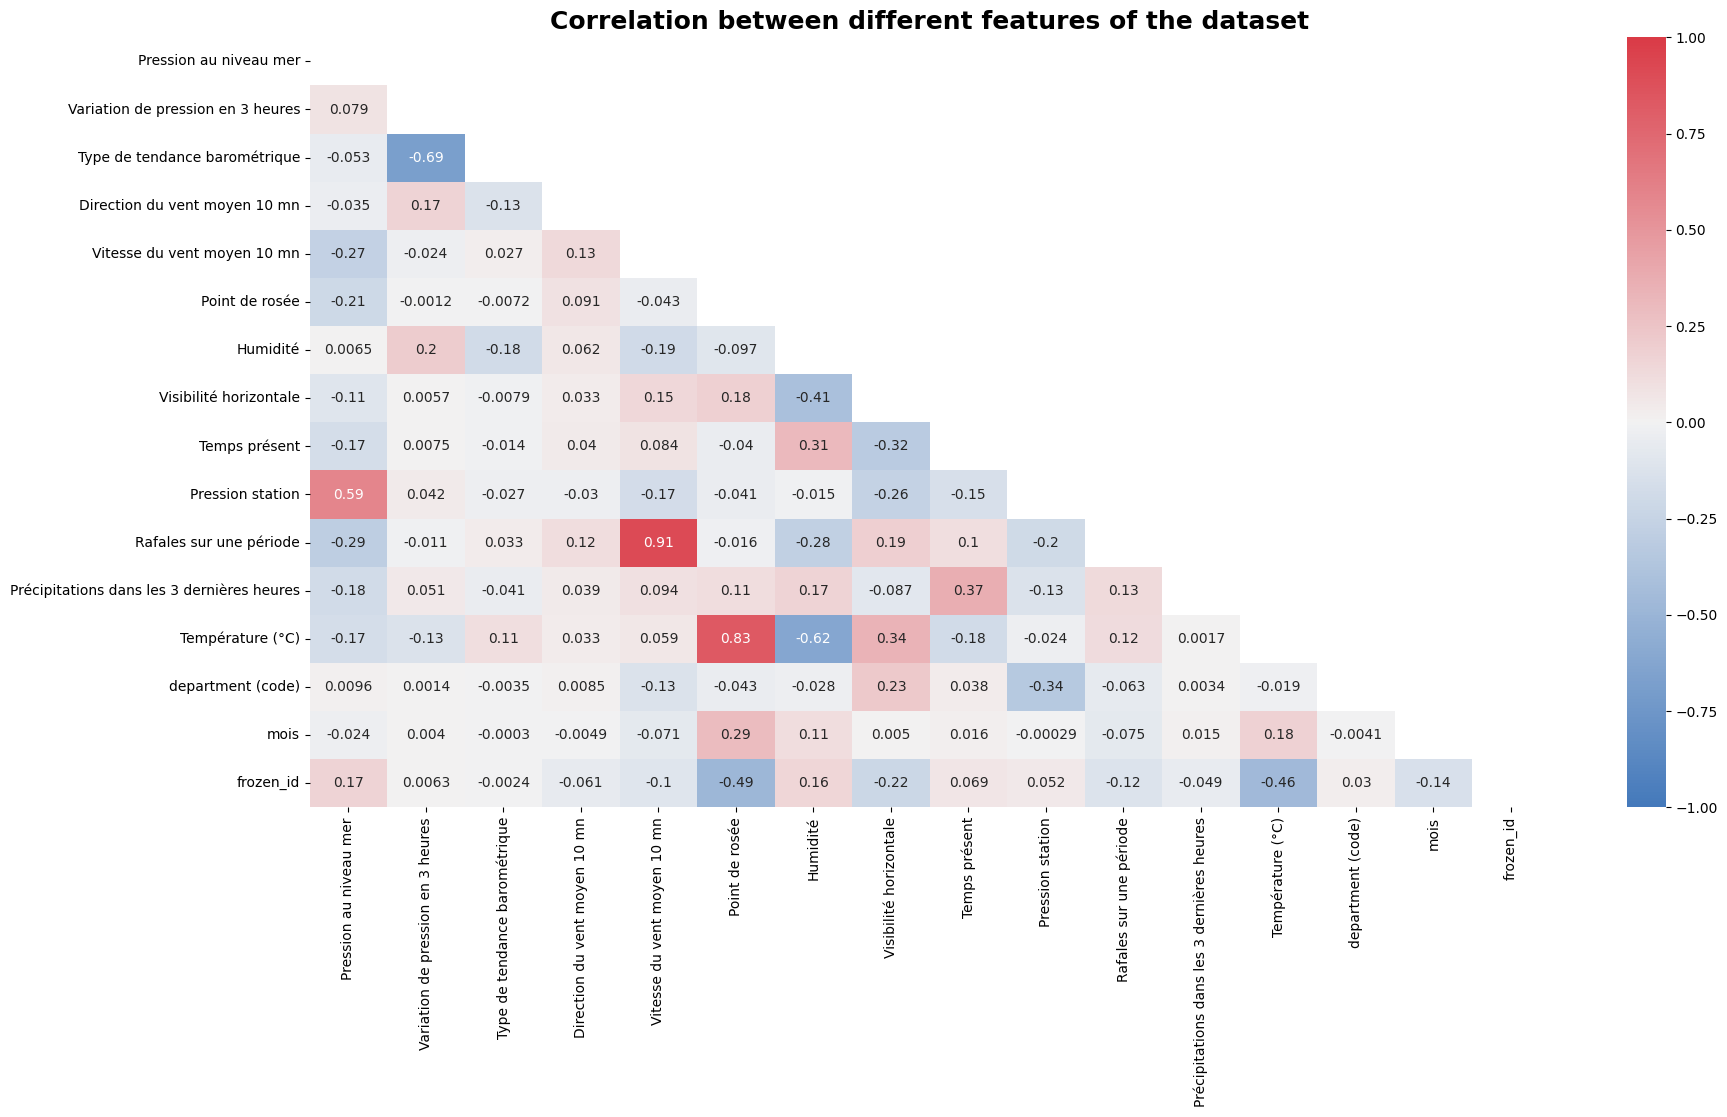

In [31]:
numerical_df = df_cleaned.select_dtypes(exclude=["object","category"])
cor=numerical_df.corr()
cmap=sns.diverging_palette(250,10,as_cmap=True)
mask=np.zeros_like(cor)
mask[np.triu_indices_from(mask)]=1
figure, ax =plt.subplots(figsize=(20,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(cor,xticklabels=numerical_df.columns,yticklabels=numerical_df.columns,cmap=cmap,annot=True,vmin=-1,vmax=1,mask=mask)

In [32]:
(df_cleaned[df_cleaned["Température (°C)"]<0].count()/len(df_cleaned))*100

Pression au niveau mer                        6.373778
Variation de pression en 3 heures             6.373778
Type de tendance barométrique                 6.373778
Direction du vent moyen 10 mn                 6.373778
Vitesse du vent moyen 10 mn                   6.373778
Point de rosée                                6.373778
Humidité                                      6.373778
Visibilité horizontale                        6.373778
Temps présent                                 6.373778
Pression station                              6.373778
Rafales sur une période                       6.373778
Précipitations dans les 3 dernières heures    6.373778
Température (°C)                              6.373778
department (code)                             6.373778
mois                                          6.373778
frozen_id                                     6.373778
dtype: float64

In [33]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Pression au niveau mer,193794.0,101727.484391,873.268276,97230.00,101240.00,101750.00,102270.00,104760.00
Variation de pression en 3 heures,193794.0,-0.086174,118.744552,-950.00,-70.00,0.00,70.00,1360.00
Type de tendance barométrique,193794.0,4.310448,2.721029,0.00,2.00,4.00,7.00,8.00
Direction du vent moyen 10 mn,193794.0,194.156269,101.782818,0.00,120.00,200.00,270.00,360.00
Vitesse du vent moyen 10 mn,193794.0,3.137318,2.130781,0.00,1.50,2.60,4.20,21.10
Point de rosée,193794.0,280.044964,6.026389,223.25,275.75,280.25,284.75,296.75
Humidité,193794.0,76.661481,18.069517,1.00,65.00,82.00,91.00,100.00
Visibilité horizontale,193794.0,23703.757598,16624.032075,30.00,12000.00,20000.00,30000.00,80000.00
Temps présent,193794.0,7.668096,18.468732,0.00,0.00,0.00,2.00,97.00
Pression station,193794.0,99321.405203,1399.046770,93580.00,98260.00,99460.00,100400.00,103530.00


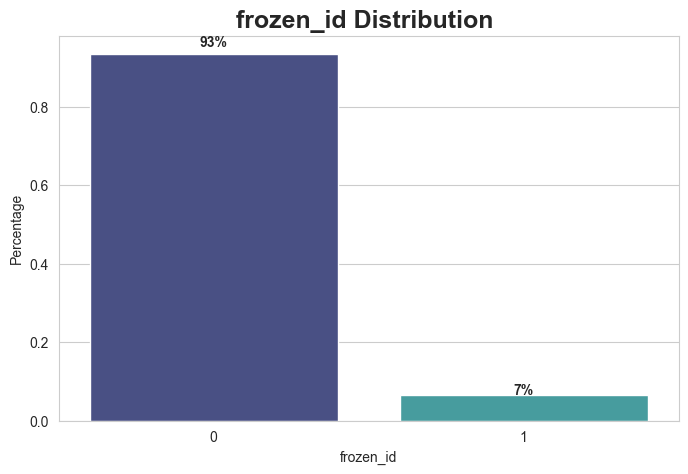

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('frozen_id Distribution ', fontsize=18, fontweight='bold')
eda_percentage = df_cleaned['frozen_id'].value_counts(normalize = True).rename_axis('frozen_id').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'frozen_id', y = 'Percentage', data = eda_percentage.head(10), palette='mako')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_19284\1721145453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Température (°C)'], hist=True, kde=True,


<Axes: xlabel='Température (°C)', ylabel='Density'>

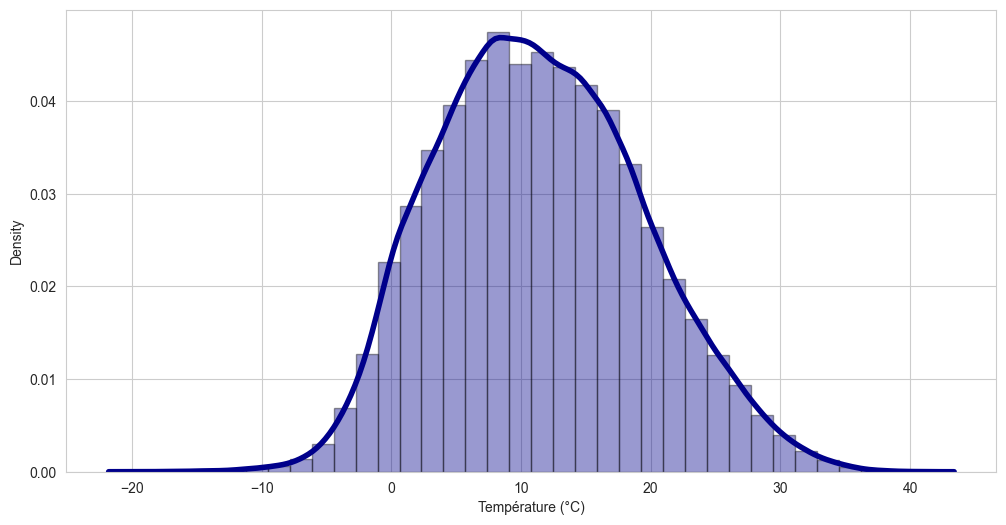

In [35]:
plt.figure(figsize=(12,6))
sns.distplot(df_cleaned['Température (°C)'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_19284\1081840190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Pression au niveau mer'], hist=True, kde=True,


<Axes: xlabel='Pression au niveau mer', ylabel='Density'>

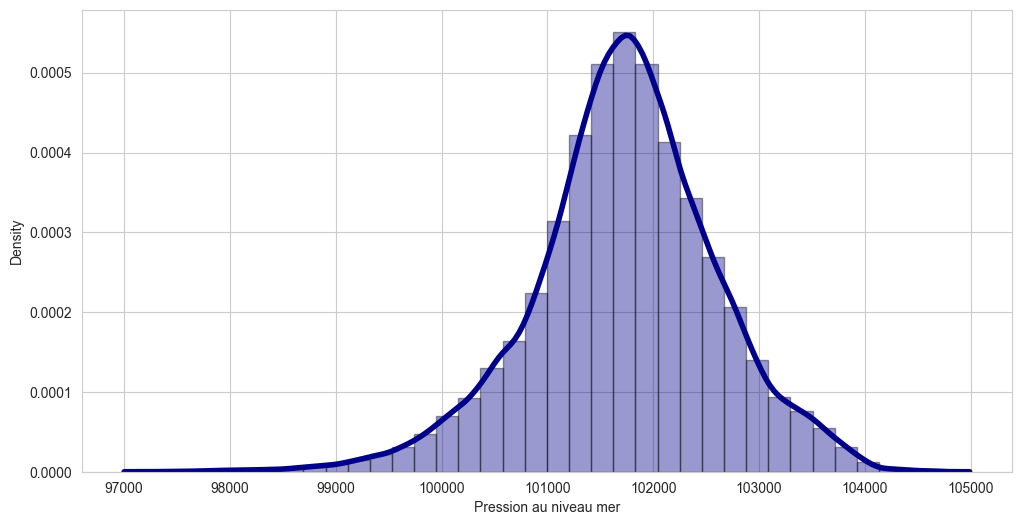

In [36]:
plt.figure(figsize=(12,6))
sns.distplot(df_cleaned['Pression au niveau mer'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [47]:
import pandas as pd
import glob

# Chemin vers les fichiers CSV (modifier le chemin selon votre cas)
chemin_fichiers_csv = 'C:/Projects/prediction_frozen/data/08_reporting/*.csv'

# Lire tous les fichiers CSV dans le dossier spécifié
tous_les_fichiers = glob.glob(chemin_fichiers_csv)
list_df = []

for fichier in tous_les_fichiers:
    # Lire chaque fichier CSV et ajouter le DataFrame à une liste
    df = pd.read_csv(fichier)
    list_df.append(df)

# Concaténer tous les DataFrames en un seul
df_concatene = pd.concat(list_df, ignore_index=True)

# Afficher le DataFrame résultant
print("DataFrame concaténé :")
print(df_concatene)

# Enregistrer le DataFrame dans un nouveau fichier CSV
chemin_nouveau_csv = 'C:/Projects/prediction_frozen/data/08_reporting/rendu_concatene.csv'
df_concatene.to_csv(chemin_nouveau_csv, index=False)

print(f"Le DataFrame a été enregistré dans {chemin_nouveau_csv}.")


PermissionError: [Errno 13] Permission denied: 'C:/Projects/prediction_frozen/data/08_reporting\\csv_region_generated.csv'

C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_19284\2046333539.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Point de rosée'], hist=True, kde=True,


<Axes: xlabel='Point de rosée', ylabel='Density'>

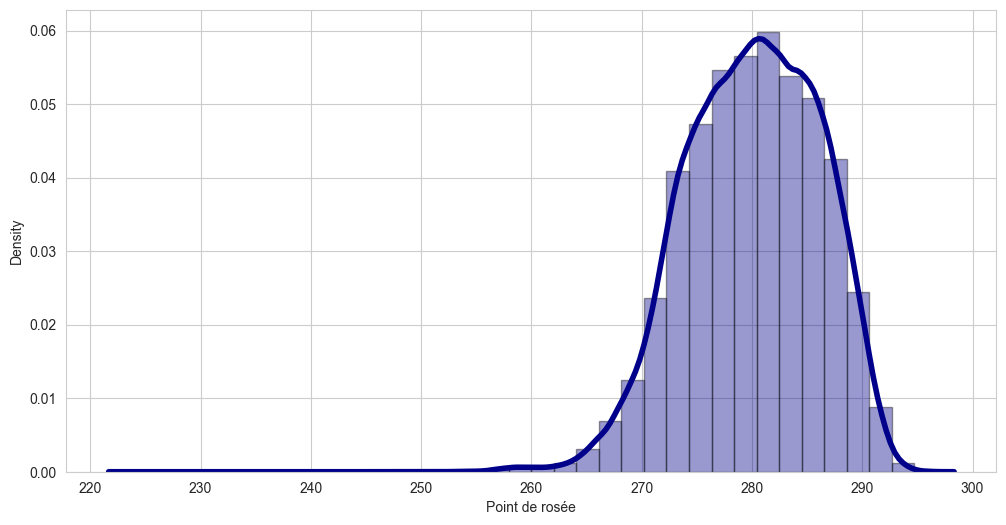

In [37]:
plt.figure(figsize=(12,6))
sns.distplot(df_cleaned['Point de rosée'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

[08/24/23 14:42:37] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_18680\1687963590.py:2: ]8;id=781144;file://c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=287011;file://c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned['Humidité'], hist=True, kde=True,                           
                                                                                                                   

<Axes: xlabel='Humidité', ylabel='Density'>

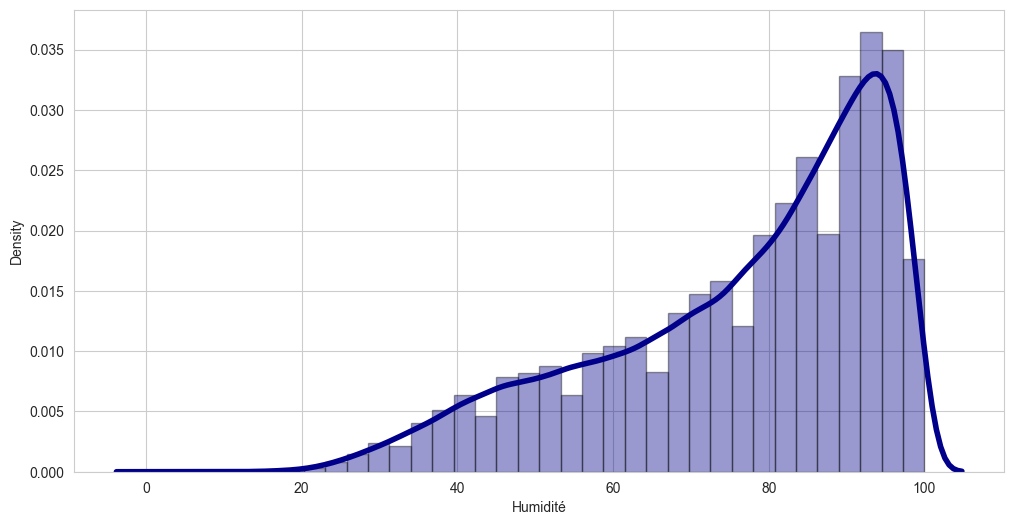

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df_cleaned['Humidité'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
df_cleaned.plot(kind = 'density', 
        subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(25,18))

plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 df_cleaned.plot(kind = 'density',                                                            │
│   2 │   │   subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(25,18))            │
│   3                                                                                              │
│   4 plt.show()                                                                                   │
│                                                                                                  │
│ c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\pandas\plotting\_core.py:975 in   │
│ __call__                                                                                         │
│                                                                                                  │
│ c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\pandas\plotting\_matplotlib\__ini │
│ t__.py:71 in plot                                                                                │
│                                                                                                  │
│ c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\pandas\plotting\_matplotlib\core. │
│ py:447 in generate                                                                               │
│                                                                                                  │
│ c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\pandas\plotting\_matplotlib\core. │
│ py:498 in _setup_subplots                                                                        │
│                                                                                                  │
│ c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\pandas\plotting\_matplotlib\tools │
│ .py:267 in create_subplots                                                                       │
│                                                                                                  │
│ c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\pandas\plotting\_matplotlib\tools │
│ .py:103 in _get_layout                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: Layout of 4x5 must be larger than required size 21

<Figure size 2500x1800 with 0 Axes>

<Axes: ylabel='Température (°C)'>

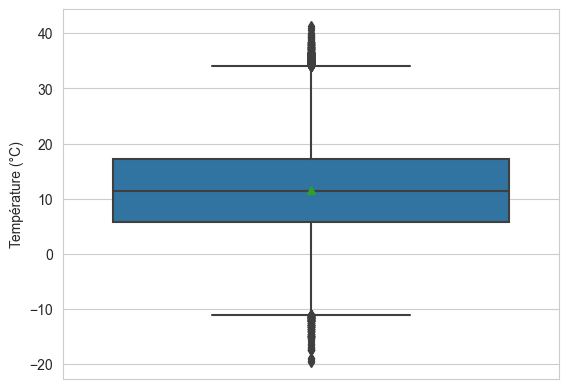

In [ ]:
sns.boxplot(y='Température (°C)',showmeans=True,data=df_cleaned)

In [41]:
df_cleaned[(df_cleaned["Point de rosée"] == 274.85) & (df_cleaned["Humidité"] == 79.0) & (df_cleaned["mois"] == "10")]

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee,date,annee,mois,jour
67628,7168,2012-10-30 00:00:00+00:00,101250.0,-140.0,6.0,150.0,1.0,278.15,274.85,79.0,...,200069250,Aube,10,Grand Est,44,10,2012-10-30,2012,10,30


[09/07/23 16:28:42] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=681995;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=555580;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

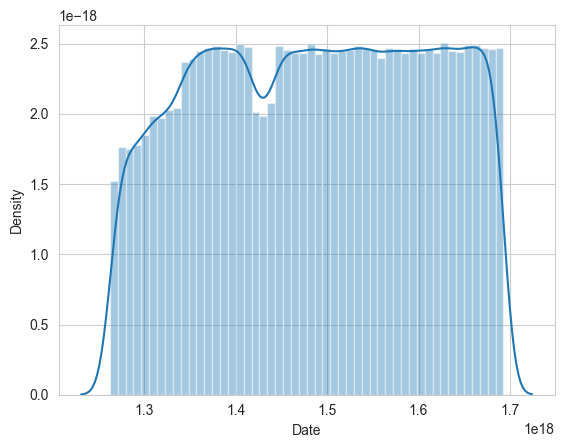

[09/07/23 16:28:43] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=227200;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=949549;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

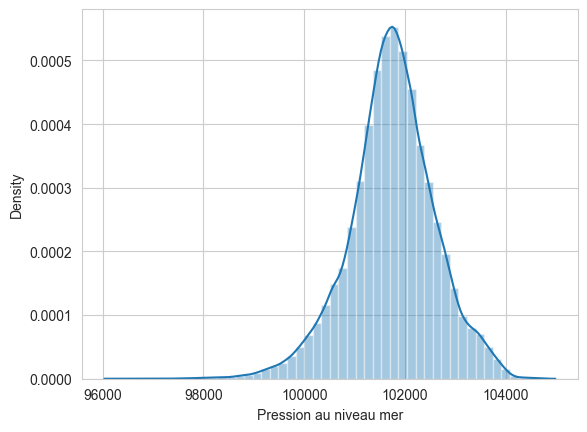

[09/07/23 16:28:44] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=986409;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=962178;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

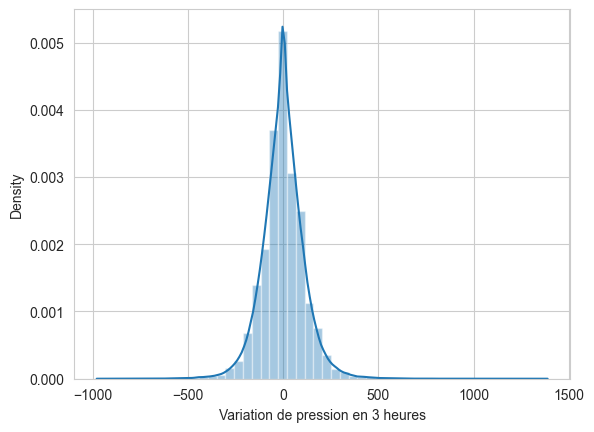

[09/07/23 16:28:45] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=410300;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=366790;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

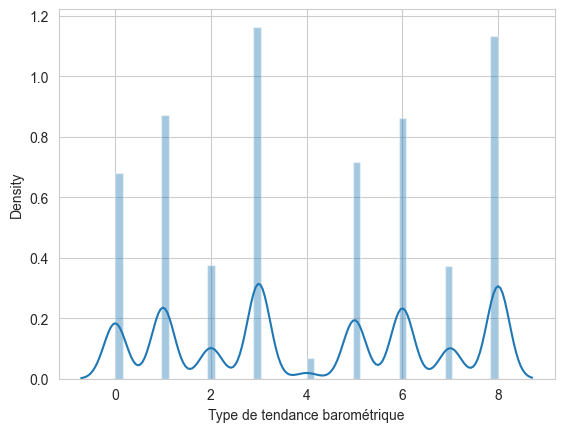

[09/07/23 16:28:46] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=105180;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=398995;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

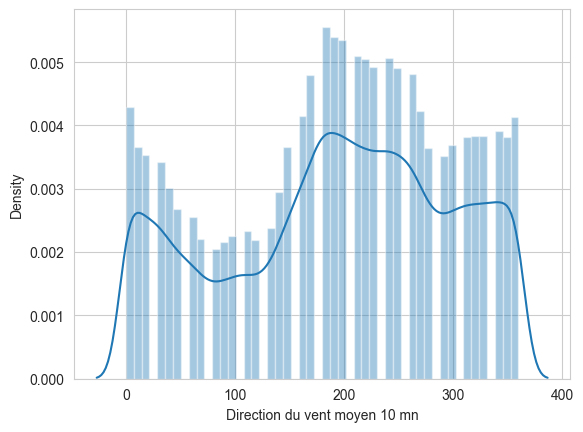

[09/07/23 16:28:47] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=354706;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=957886;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

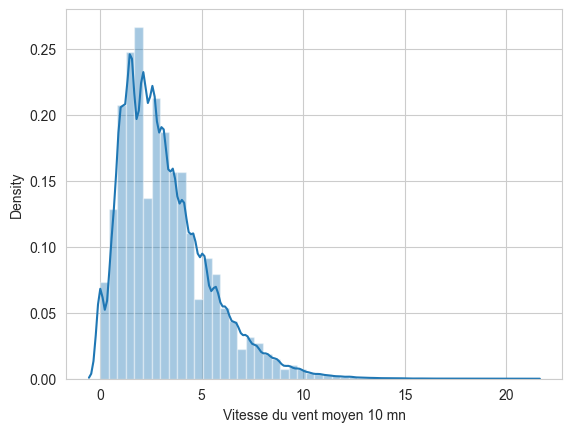

[09/07/23 16:28:48] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=527776;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=775270;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

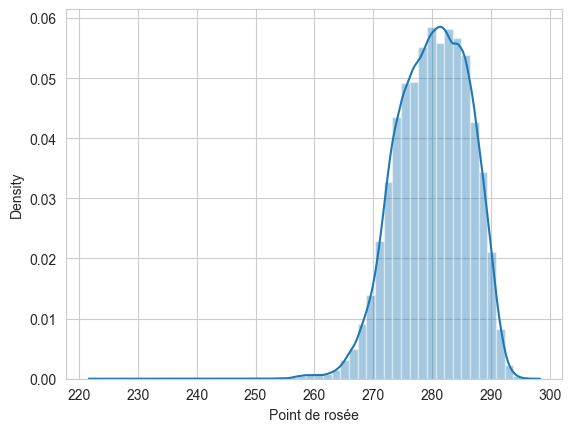

[09/07/23 16:28:49] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=963303;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=477948;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

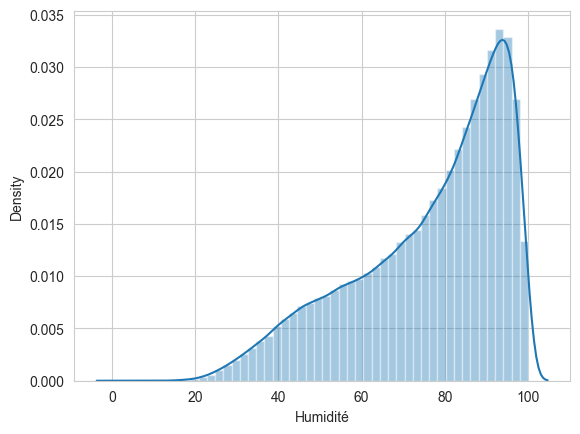

[09/07/23 16:28:51] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=110163;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=985812;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

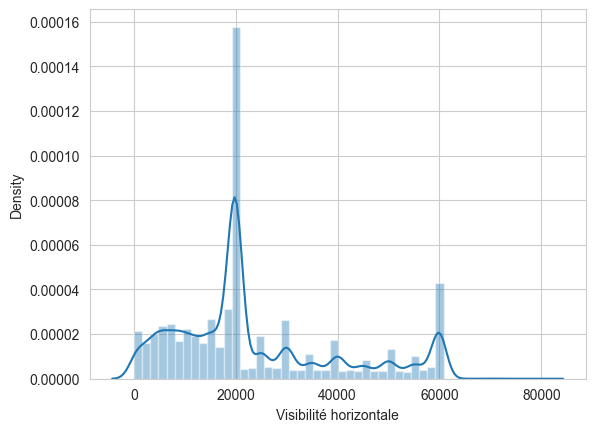

[09/07/23 16:28:52] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=563173;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=64576;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

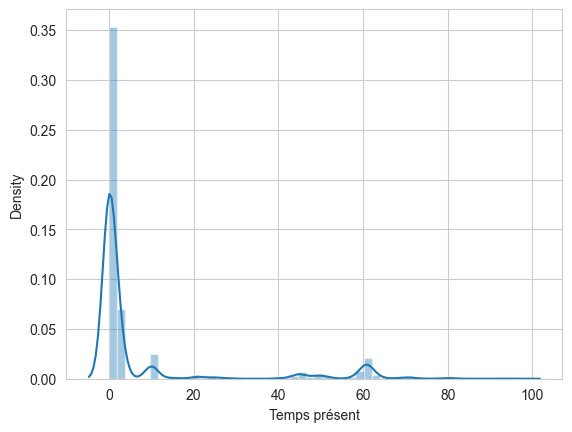

[09/07/23 16:28:53] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=96268;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=32083;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

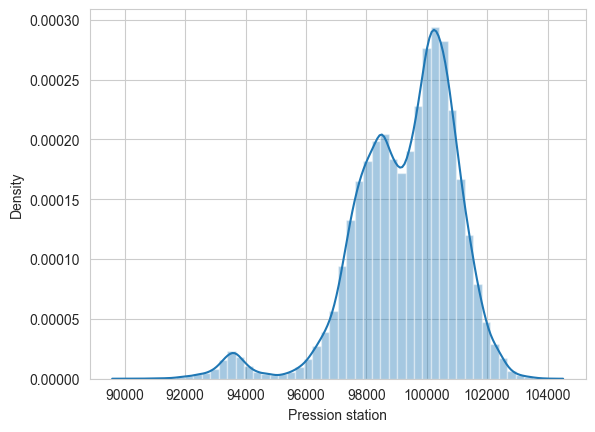

[09/07/23 16:28:54] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=636101;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=973697;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

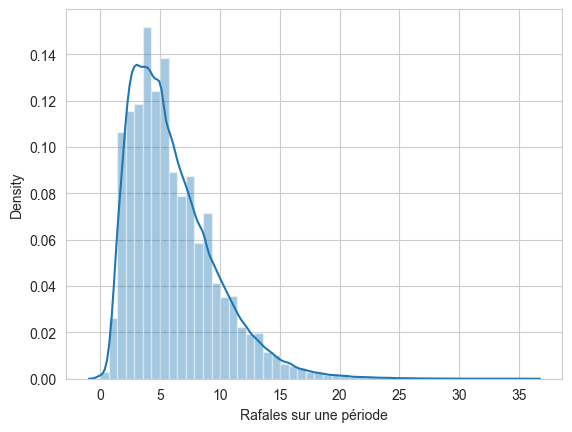

[09/07/23 16:28:55] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=574472;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=945640;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

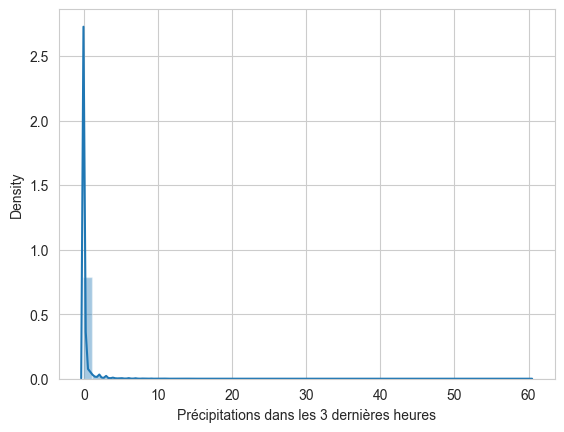

[09/07/23 16:28:56] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=330263;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=611877;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

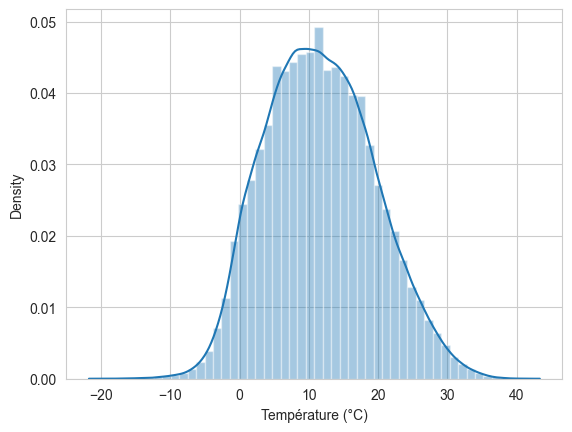

[09/07/23 16:28:57] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=61305;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=819708;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

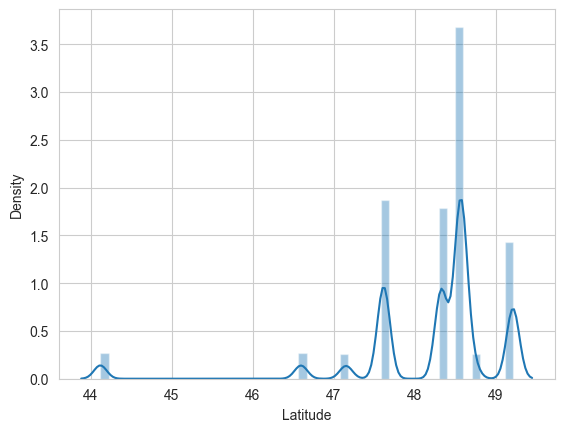

[09/07/23 16:28:58] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=61669;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=28361;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

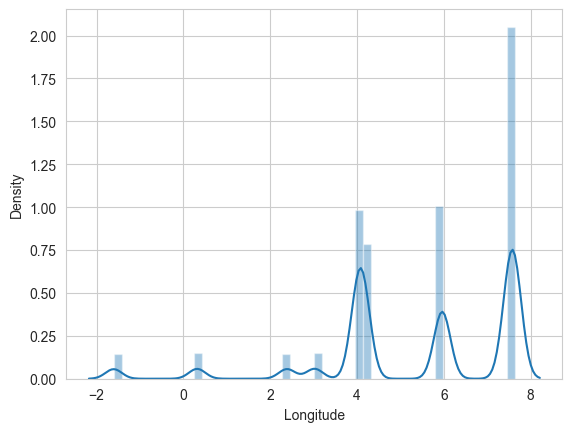

[09/07/23 16:28:59] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=46270;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=958136;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

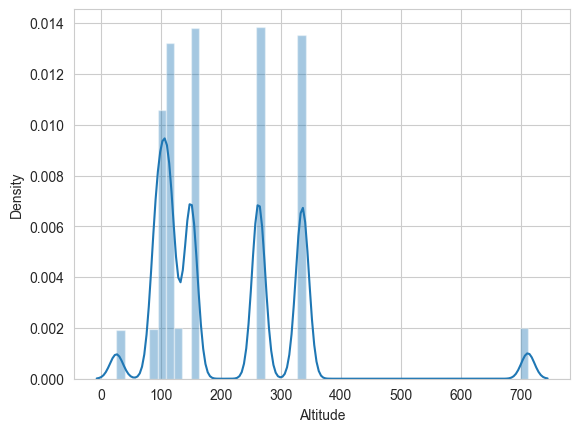

[09/07/23 16:29:00] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=205322;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=331277;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

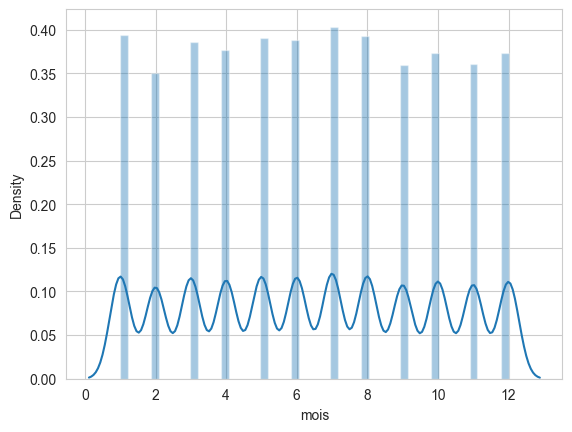

[09/07/23 16:29:02] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=354313;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=268437;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

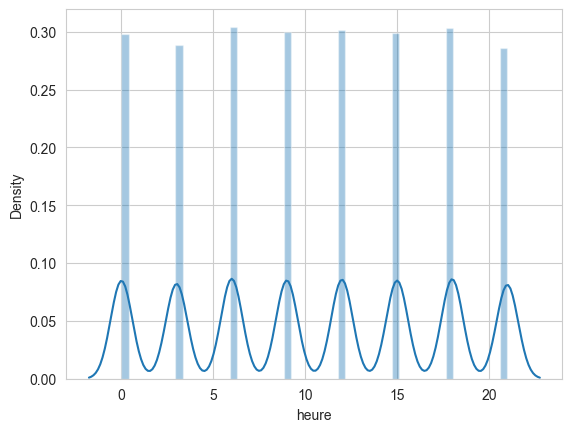

[09/07/23 16:29:03] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5908\985804983.py:3:   ]8;id=28236;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=836563;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df_cleaned[i])                                                         
                                                                                                                   

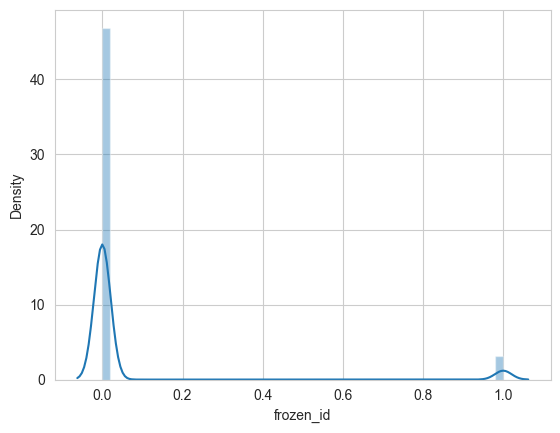

In [19]:
for i in df_cleaned.columns:
    plt.figure()
    sns.distplot(df_cleaned[i])
    plt.show()

In [45]:
import statsmodels.api as sm
for col in df_cleaned.columns:
    plt.figure(),sm.qqplot(df_cleaned[col],fit=True, line ='45'),plt.title(f'diagramme Q-Q :"{col}"'),plt.show(),plt.close()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:3                                                                                    │
│                                                                                                  │
│   1 import statsmodels.api as sm                                                                 │
│   2 for col in df_cleaned.columns:                                                               │
│ ❱ 3 │   plt.figure(),sm.qqplot(df_cleaned[col],fit=True, line ='45'),plt.title(f'diagramme Q     │
│   4                                                                                              │
│                                                                                                  │
│ c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmodels\graphics\gofplots.py: │
│ 688 in qqplot                                                                                    │
│                                                                                                  │
│ c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmodels\graphics\gofplots.py: │
│ 223 in __init__                                                                                  │
│                                                                                                  │
│ c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\scipy\stats\_continuous_distns.py │
│ :66 in wrapper                                                                                   │
│                                                                                                  │
│ c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\scipy\stats\_continuous_distns.py │
│ :407 in fit                                                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any 
supported types according to the casting rule ''safe''

<Figure size 640x480 with 0 Axes>

In [46]:
from scipy.stats import ttest_ind

# Générer des données de démonstration
category =df_cleaned['frozen_id']
numeric_value = df_cleaned['Température (°C)']

# Effectuer le t-test indépendant
t_statistic, p_value = ttest_ind(numeric_value[category == 0], numeric_value[category == 1])
print("Statistique t:", t_statistic)
print("Valeur p associée:", p_value)

Statistique t: 223.8487521671661
Valeur p associée: 0.0


In [47]:
from scipy.stats import f_oneway

# Générer des données de démonstration
group_0 = df_cleaned['frozen_id']
group_1 = df_cleaned['Température (°C)']

# Effectuer l'analyse de variance (ANOVA)
f_statistic, p_value = f_oneway(group_0, group_1)

print("Statistique F:", f_statistic)
print("Valeur p associée:", p_value)

Statistique F: 384141.7843518268
Valeur p associée: 0.0


In [48]:
df_cleaned.columns

Index(['Date', 'Pression au niveau mer', 'Variation de pression en 3 heures',
       'Type de tendance barométrique', 'Direction du vent moyen 10 mn',
       'Vitesse du vent moyen 10 mn', 'Point de rosée', 'Humidité',
       'Visibilité horizontale', 'Temps présent', 'Pression station',
       'Rafales sur une période', 'Précipitations dans les 3 dernières heures',
       'Température (°C)', 'Latitude', 'Longitude', 'Altitude', 'mois',
       'heure', 'frozen_id', 'distance_to_ref'],
      dtype='object')

In [49]:
import numpy as np

mean_temp_gele = np.mean(df_cleaned[df_cleaned['frozen_id'] == 1]['Température (°C)'])
mean_temp_non_gele = np.mean(np.mean(df_cleaned[df_cleaned['frozen_id'] == 0]['Température (°C)']))

print(mean_temp_gele)
print(mean_temp_non_gele)

# Calcul de l'écart-type de température pour chaque groupe
std_dev_temp_gele = np.std(df_cleaned[df_cleaned['frozen_id'] == 1]['Température (°C)'])
std_dev_temp_non_gele = np.std(df_cleaned[df_cleaned['frozen_id'] == 0]['Température (°C)'])

print(std_dev_temp_gele)
print(std_dev_temp_non_gele)

# Calcul du coefficient de corrélation de point-biserial
point_biserial = (mean_temp_gele - mean_temp_non_gele) / np.sqrt((std_dev_temp_gele**2 + std_dev_temp_non_gele**2) / 2)

print("Coefficient de corrélation de point-biserial:", point_biserial)

-2.419721231228717
12.456786440911781
2.3866251511269616
7.269022726658835
Coefficient de corrélation de point-biserial: -2.749852489076669


In [50]:
# Exemple de données
variable_binaire = df_cleaned['frozen_id']  # Variable binaire (gèle/ne gèle pas)
variable_numerique = df_cleaned['Température (°C)']  # Variable numérique (température)

# Calcul du pourcentage de corrélation basé sur la proportion des coïncidences
coincidences = sum([1 for binaire, numerique in zip(variable_binaire, variable_numerique) if binaire == 1 and numerique >= 0])
pourcentage_correlation = (coincidences / len(variable_binaire)) * 100

print("Pourcentage de corrélation :", pourcentage_correlation, "%")


Pourcentage de corrélation : 0.16608706402145693 %


In [51]:
import numpy as np

variable_binaire = df_cleaned[df_cleaned['frozen_id'] == 1]['frozen_id']  # Variable binaire (gèle/ne gèle pas)
variable_numerique = df_cleaned[df_cleaned['frozen_id'] == 1]['Température (°C)']  # Variable numérique (température)

# Calculer la corrélation (pearsonr renvoie un tuple, nous ne prenons que la corrélation)
correlation = np.corrcoef(variable_binaire, variable_numerique)[1][1]*100

print("Coefficient de corrélation entre la variable gèle et température :", correlation)

[08/24/23 14:43:12] WARNING  c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\numpy\l ]8;id=303597;file://c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=145880;file://c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             ib\function_base.py:2854: RuntimeWarning: invalid value encountered in                
                             divide                                                                                
                               c /= stddev[:, None]                                                                
                                                                                                                   

                    WARNING  c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\numpy\l ]8;id=586159;file://c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=958539;file://c:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             ib\function_base.py:2855: RuntimeWarning: invalid value encountered in                
                             divide                                                                                
                               c /= stddev[None, :]                                                                
                                                                                                                   

Coefficient de corrélation entre la variable gèle et température : 99.99999999999997


In [52]:
from scipy.stats import pointbiserialr

# Données de température et gelé (0: ne gèle pas, 1: gèle)
group_0 = df_cleaned['frozen_id']
group_1 = df_cleaned['Température (°C)']

# Calcul du coefficient de corrélation de rang de biserial (phi)
phi, p_value = pointbiserialr(group_0, group_1)

print("Coefficient de corrélation de rang de biserial (phi):", phi)
print("Valeur de p:", p_value)

Coefficient de corrélation de rang de biserial (phi): -0.4606358147467597
Valeur de p: 0.0


In [223]:
df_cleaned.columns

Index(['Date', 'Pression au niveau mer', 'Variation de pression en 3 heures',
       'Type de tendance barométrique', 'Direction du vent moyen 10 mn',
       'Vitesse du vent moyen 10 mn', 'Point de rosée', 'Humidité',
       'Visibilité horizontale', 'Temps présent', 'Pression station',
       'Rafales sur une période', 'Précipitations dans les 3 dernières heures',
       'Température (°C)', 'Latitude', 'Longitude', 'Altitude', 'mois',
       'heure', 'frozen_id'],
      dtype='object')

In [383]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cleaned_ = df_cleaned.drop(columns = ['Rafales sur une période', 'Visibilité horizontale', 'Vitesse du vent moyen 10 mn', 'Variation de pression en 3 heures', 'Pression station', 'Direction du vent moyen 10 mn', "frozen_id", 'Température (°C)', 'Date', 'Temps présent', 'Type de tendance barométrique', 'Précipitations dans les 3 dernières heures', ])
Y = df_cleaned.iloc[:,[-1]]
# df_cleaned_X = scaler.fit_transform(df_cleaned_)
# X =  pd.DataFrame(df_cleaned_X, columns=df_cleaned_.columns)
# X

In [384]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(df_cleaned_,Y,test_size=0.2,random_state=42, stratify=Y)

In [385]:
import xgboost as xgb

model = xgb.XGBClassifier(scale_pos_weight=16,
                          objective='binary:logistic',
                          random_state=42)

model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [436]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208953 entries, 0 to 215130
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype              
---  ------                                      --------------   -----              
 0   Date                                        208953 non-null  datetime64[ns, UTC]
 1   Pression au niveau mer                      208953 non-null  float64            
 2   Variation de pression en 3 heures           208953 non-null  float64            
 3   Type de tendance barométrique               208953 non-null  float64            
 4   Direction du vent moyen 10 mn               208953 non-null  float64            
 5   Vitesse du vent moyen 10 mn                 208953 non-null  float64            
 6   Point de rosée                              208953 non-null  float64            
 7   Humidité                                    208953 non-null  float64            
 8   Visibilité horizontale       

In [386]:
predictions = model.predict(x_train)
accuracy = accuracy_score(y_train, predictions)
print("Accuracy :", accuracy)

Accuracy : 0.9993240090451179


In [387]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, f1_score


predictions = model.predict(x_test)

confusion = confusion_matrix(y_test, predictions)
print("Matrice de confusion :\n", confusion)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy :", accuracy)

precision = precision_score(y_test, predictions)
print("Précision :", precision)

roc_auc = roc_auc_score(y_test, predictions)
print("Score AUC-ROC :", roc_auc)

Matrice de confusion :
 [[39132    75]
 [   20  2564]]
Accuracy : 0.9977267832786963
Précision : 0.9715801439939371
Score AUC-ROC : 0.9951735691034511


In [388]:
probabilities = model.predict_proba(x_test)
probabilities

array([[1.0000000e+00, 6.8791756e-12],
       [9.9999386e-01, 6.1346777e-06],
       [9.9999905e-01, 9.6101201e-07],
       ...,
       [9.9999535e-01, 4.6452083e-06],
       [1.0000000e+00, 1.3068894e-09],
       [1.0000000e+00, 3.5953122e-11]], dtype=float32)

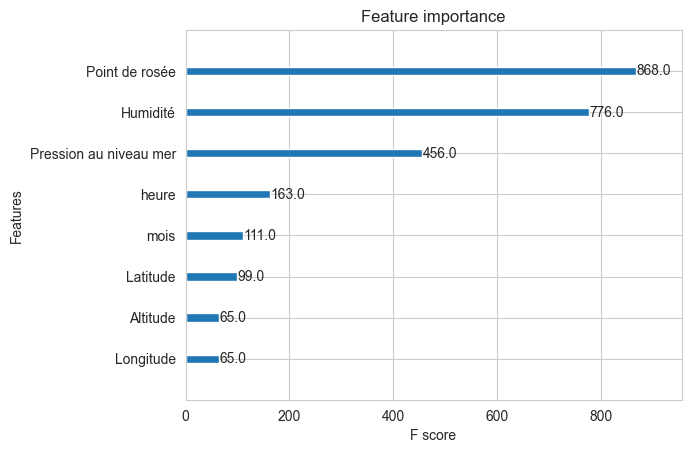

In [389]:
from xgboost import plot_importance


# Tracer l'importance des variables
plot_importance(model)
plt.show()

# Obtenez les scores d'importance des variables
importances = model.feature_importances_

# Plus le score d'importance est élevé, plus la variable est importante pour la prédiction
# F-score mesure à quel point une variable est utilisée pour diviser les données lors de la construction des arbres de décision.

In [390]:
x_train.columns

Index(['Pression au niveau mer', 'Point de rosée', 'Humidité', 'Latitude',
       'Longitude', 'Altitude', 'mois', 'heure'],
      dtype='object')

In [486]:
date_recherche = pd.to_datetime("2022-01-29 14:00:00+00:00", )

# Extraction de la ligne basée sur la date
ligne_date_recherche = df_cleaned.loc[df_cleaned['Date'] == date_recherche]
ligne_date_recherche

,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Visibilité horizontale,Temps présent,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures,Température (°C),Latitude,Longitude,Altitude,mois,heure,frozen_id


In [483]:
ligne_date_recherche.set_index('Date', inplace=True)

In [484]:
ligne_date_recherche.resample('D').median()

,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Visibilité horizontale,Temps présent,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures,Température (°C),Latitude,Longitude,Altitude,mois,heure,frozen_id
Date,,,,,,,,,,,,,,,,,,,
2022-01-29 00:00:00+00:00,103740.0,-90.0,7.0,220.0,1.8,273.75,96.0,5950.0,0.0,101750.0,3.3,0.0,1.0,48.324667,4.155333,150.0,1.0,0.0,0.0


In [473]:
data = {
    'Pression au niveau mer': [0],
#     'Variation de pression en 3 heures' : [20],
#     'Direction du vent moyen 10 mn': [340],
#     'Vitesse du vent moyen 10 mn': [0.5],
    'Point de rosée': [0],
    'Humidité': [0],
#     'Visibilité horizontale': [530],
#     'Pression station': [100410],
#     'Rafales sur une période': [2.5],
    'Latitude': [48.269953],
    'Longitude': [4.0704271],
    'Altitude': [1000],
    'mois': [7],
    'heure': [12]}

x_pred = pd.DataFrame(data)

In [474]:
model.predict(x_pred)

array([0])

In [475]:
model.predict_proba(x_pred)[0][1]*100

0.3712954930961132

In [395]:
series = df_cleaned.loc[:, ["Date", 'Pression au niveau mer', 'Variation de pression en 3 heures', 'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn', 'Point de rosée', 'Humidité', 'Visibilité horizontale', 'Pression station',  'Rafales sur une période']]

In [276]:
series['Date'] = pd.to_datetime(series['Date'], utc=True)
# series['date'] = pd.to_datetime(series['Date'].dt.strftime('%Y-%m-%d'))
# series['annee'] = series['Date'].dt.strftime('%Y')
# series['mois'] = series['Date'].dt.strftime('%m')
# series["jour"] = series['Date'].dt.strftime('%d')
# series['heure'] = series['Date'].dt.strftime('%H')
# series['minute'] = series['Date'].dt.strftime('%M')
# series = series.astype({'annee': int, 'mois': int, 'jour': int, "heure": int, "minute": int})
series.set_index('Date', inplace=True)

In [253]:
series.drop(columns = ["Date"], inplace = True)

In [277]:
series

,Pression au niveau mer,Variation de pression en 3 heures,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Visibilité horizontale,Pression station,Rafales sur une période
Date,,,,,,,,,
2010-01-05 09:00:00+00:00,100280.0,-50.0,260.0,1.5,275.75,100.0,4000.0,91870.0,2.1
2010-01-06 06:00:00+00:00,100350.0,20.0,0.0,0.0,261.25,89.0,5000.0,98900.0,1.0
2010-01-06 09:00:00+00:00,100380.0,50.0,160.0,1.0,264.45,86.0,6000.0,98950.0,2.1
2010-01-06 09:00:00+00:00,100480.0,110.0,260.0,1.0,265.35,90.0,2500.0,96180.0,2.1
2010-01-07 12:00:00+00:00,101160.0,140.0,10.0,3.1,271.85,82.0,15000.0,100830.0,6.2
...,...,...,...,...,...,...,...,...,...
2023-03-10 12:00:00+00:00,99910.0,140.0,240.0,12.4,279.65,83.0,9350.0,96690.0,23.0
2023-03-16 06:00:00+00:00,101680.0,-70.0,130.0,2.2,272.65,79.0,20000.0,100210.0,4.2
2023-03-27 00:00:00+00:00,101540.0,460.0,340.0,6.9,276.45,84.0,20000.0,100370.0,11.1


In [278]:
daily_average = series.resample('D').median()
daily_average

,Pression au niveau mer,Variation de pression en 3 heures,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Visibilité horizontale,Pression station,Rafales sur une période
Date,,,,,,,,,
2010-01-01 00:00:00+00:00,99420.0,120.0,290.0,4.10,274.45,97.0,4500.0,97380.0,6.70
2010-01-02 00:00:00+00:00,101950.0,190.0,250.0,3.10,269.35,80.0,20000.0,99590.0,6.20
2010-01-03 00:00:00+00:00,102105.0,-40.0,170.0,2.10,269.80,82.0,20000.0,100350.0,3.85
2010-01-04 00:00:00+00:00,101680.0,-70.0,60.0,3.10,267.05,83.0,10000.0,99640.0,5.10
2010-01-05 00:00:00+00:00,100610.0,-120.0,40.0,2.60,266.15,84.0,8000.0,98470.0,4.10
...,...,...,...,...,...,...,...,...,...
2023-08-20 00:00:00+00:00,102055.0,10.0,270.0,1.95,291.70,69.5,20000.0,100330.0,4.25
2023-08-21 00:00:00+00:00,102150.0,5.0,305.0,2.60,291.35,65.0,20370.0,100410.0,5.00
2023-08-22 00:00:00+00:00,101975.0,-25.0,260.0,2.20,289.70,57.5,25605.0,100195.0,4.60


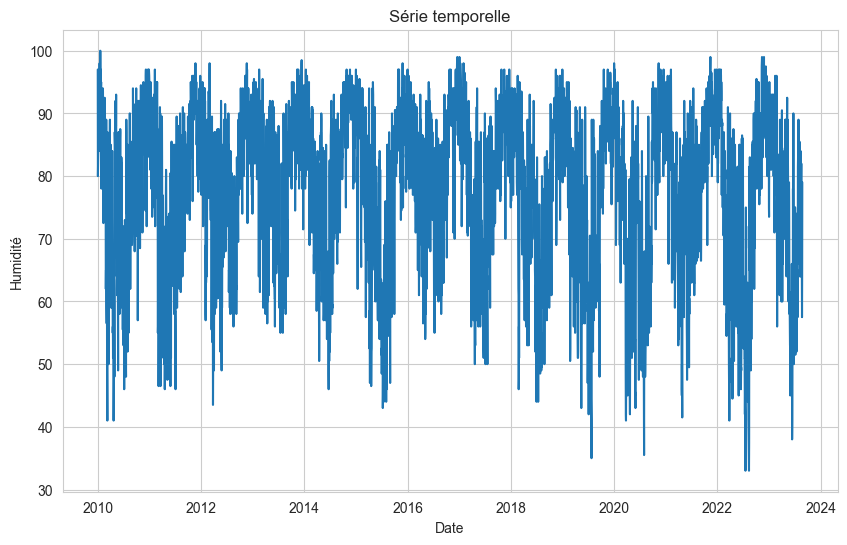

<Figure size 1000x600 with 0 Axes>

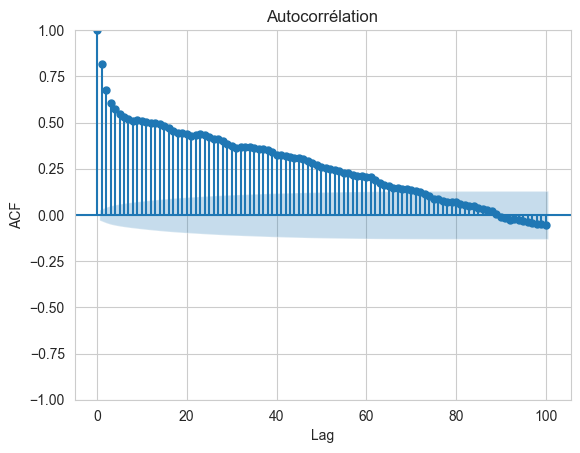

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:27                                                                                   │
│                                                                                                  │
│   24 plt.show()                                                                                  │
│   25                                                                                             │
│   26 # Trouver les pics dans l'ACF (période saisonnière)                                         │
│ ❱ 27 acf_values = plot_acf(data['Humidité'], lags=100, plot=False)                               │
│   28 peaks, _ = find_peaks(acf_values)                                                           │
│   29 periods = np.diff(peaks)                                                                    │
│   30                                                                                             │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\pandas\util\_decorators.py:210 in │
│ wrapper                                                                                          │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmodels\graphics\tsaplots.py: │
│ 227 in plot_acf                                                                                  │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmodels\graphics\tsaplots.py: │
│ 50 in _plot_corr                                                                                 │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\matplotlib\axes\_axes.py:772 in   │
│ axhline                                                                                          │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\matplotlib\_api\deprecation.py:45 │
│ 4 in wrapper                                                                                     │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\matplotlib\lines.py:393 in        │
│ __init__                                                                                         │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\matplotlib\artist.py:1223 in      │
│ _internal_update                                                                                 │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\matplotlib\artist.py:1197 in      │
│ _update_props                                                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: Line2D.set() got an unexpected keyword argument 'plot'

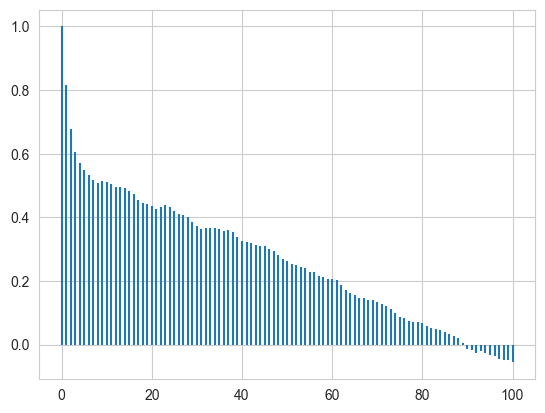

In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.signal import find_peaks

# Charger tes données dans un DataFrame (remplace cela avec ton propre chargement de données)
data = daily_average
data["Date"] = data.index
# Tracer la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Humidité'])
plt.xlabel('Date')
plt.ylabel('Humidité')
plt.title('Série temporelle')
plt.show()

# Calculer et tracer l'ACF
plt.figure(figsize=(10, 6))
plot_acf(data['Humidité'], lags=100)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrélation')
plt.show()

# Trouver les pics dans l'ACF (période saisonnière)
acf_values = plot_acf(data['Humidité'], lags=100, plot=False)
peaks, _ = find_peaks(acf_values)
periods = np.diff(peaks)

print("Périodes possibles :", periods)


Text(0.5, 1.0, 'Rafales sur une période')

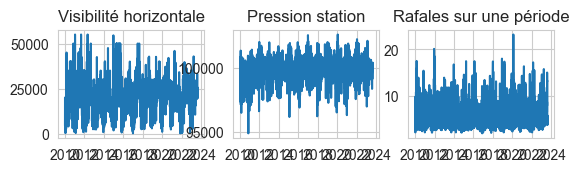

In [280]:
Pression = daily_average["Pression au niveau mer"]
variation_pression = daily_average['Variation de pression en 3 heures']
Direction_vent = daily_average['Direction du vent moyen 10 mn']
Vitesse_vent = daily_average['Vitesse du vent moyen 10 mn']
point_rose = daily_average['Point de rosée']
Humidite = daily_average['Humidité']
horizontale = daily_average['Visibilité horizontale']
station = daily_average['Pression station']
Rafales = daily_average['Rafales sur une période']


plt.subplot(337)
plt.plot(horizontale)
plt.title('Visibilité horizontale')

plt.subplot(338)
plt.plot(station)
plt.title('Pression station')

plt.subplot(339)
plt.plot(Rafales)
plt.title('Rafales sur une période')

In [281]:
from statsmodels.tsa.stattools import adfuller

for v in [Pression, variation_pression, Direction_vent, Vitesse_vent, point_rose, Humidite, horizontale, station, Rafales]:
    _, p, _, _, _, _ = adfuller(variation_pression)
    print("La p-value est de: ", round(p, 5))

La p-value est de:  0.0
La p-value est de:  0.0
La p-value est de:  0.0
La p-value est de:  0.0
La p-value est de:  0.0
La p-value est de:  0.0
La p-value est de:  0.0
La p-value est de:  0.0
La p-value est de:  0.0


In [323]:
from statsmodels.tsa.arima.model import ARIMA

arma = ARIMA(station, order=(0,1,5)).fit()

arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Pression station   No. Observations:                 4984
Model:                 ARIMA(0, 1, 5)   Log Likelihood              -38598.066
Date:                Fri, 25 Aug 2023   AIC                          77208.131
Time:                        14:49:16   BIC                          77247.214
Sample:                    01-01-2010   HQIC                         77221.832
                         - 08-24-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0642      0.007     -9.155      0.000      -0.078      -0.050
ma.L2         -0.2029      0.004    -48.539      0.000      -0.211      -0.195
ma.L3         -0.1644      0.005    -31.643      0.000      -0.175      -0.154
ma.L4         -0.1261      0.005    -23.763      0.000      -0.136      -0.116
ma.L5         -0.0739      0.005    -15.051      0.000      -0.083      -0.064
sigma2      3.033e+05   4558.976     66.523      0.000    2.94e+05    3.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):              1057.67
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

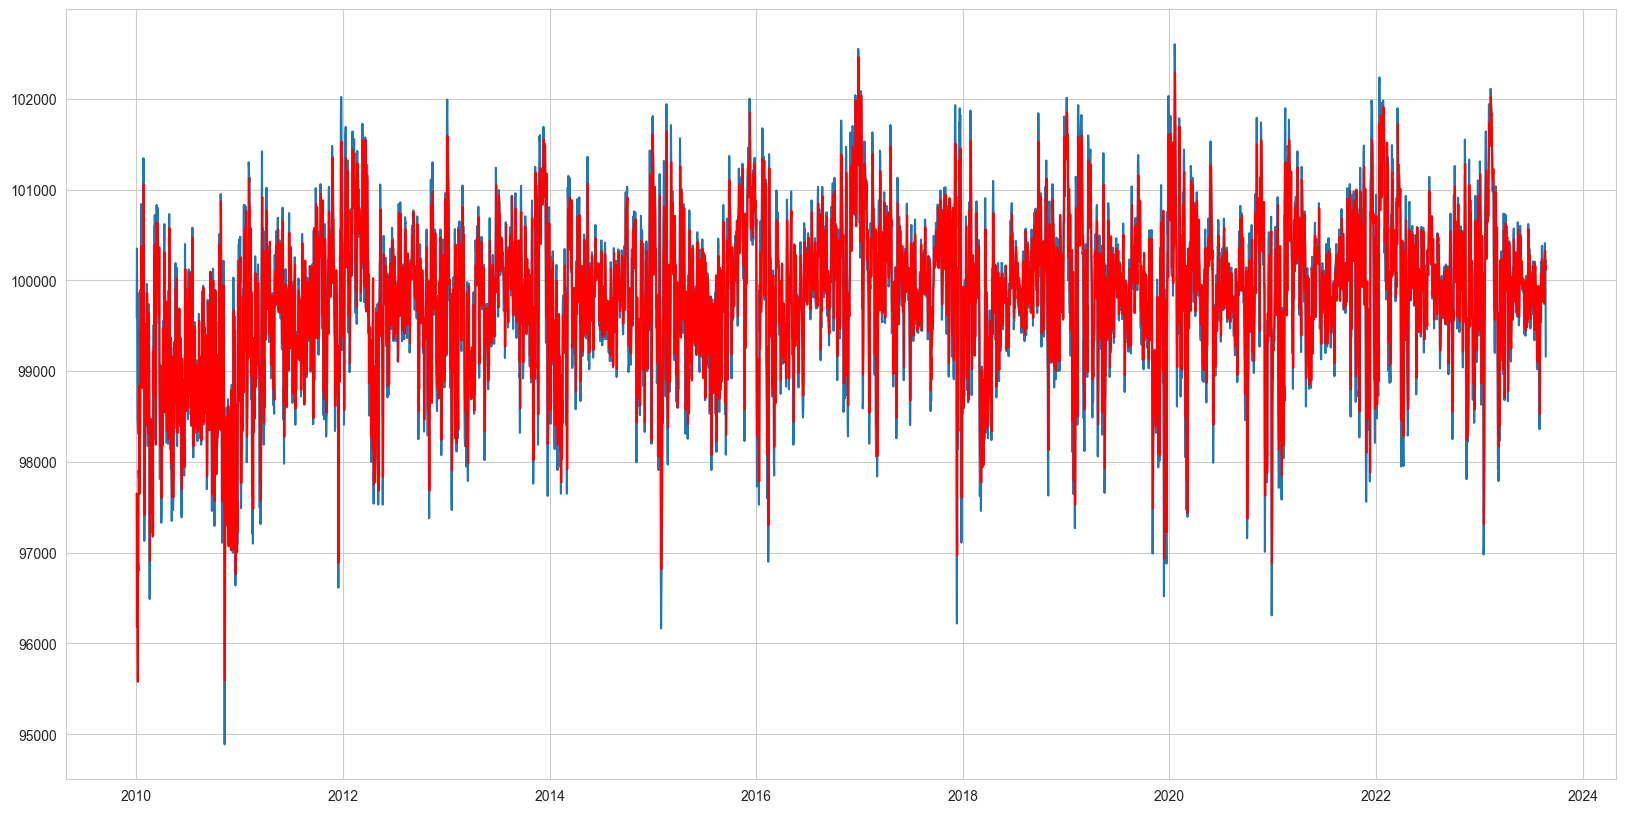

In [328]:
pred = arma.predict().iloc[1:]

plt.figure(figsize=(20,10))
plt.plot(station.iloc[1:])
plt.plot(pred, color = "r")

<Axes: ylabel='Pression station'>

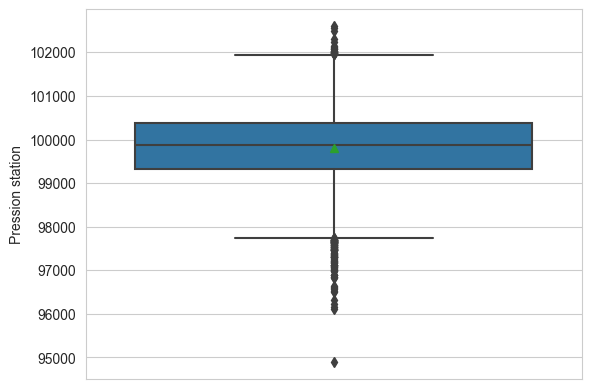

In [305]:
sns.boxplot(y=station,showmeans=True)

In [284]:
from pmdarima import auto_arima

# Liste des noms de colonnes (séries temporelles)
series_names = daily_average.columns
dict_prev = {}
# Boucle pour entraîner et prédire chaque série temporelle
for series_name in series_names:
    series = daily_average[series_name]

    # Trouver automatiquement les paramètres ARIMA pour chaque série
    model = auto_arima(series, seasonal=True, trace=True)
    
    # Entraîner le modèle avec les paramètres trouvés
    model_fit = model.fit(series)
    dict_prev[series_name] = model_fit
    # Faire des prédictions futures
    forecast_steps = 7  # Par exemple, prévoir 7 pas de temps à l'avance
    forecast = model_fit.predict(n_periods=forecast_steps)
    
    print(f"Prévisions pour la série {series_name} :", forecast)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=129079.173, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=76630.220, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=76551.586, Time=1.35 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=75956.391, Time=1.71 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=76056.567, Time=2.32 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=76559.192, Time=1.97 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=3.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=75856.348, Time=3.74 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=75925.509, Time=3.

 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=23009.871, Time=1.58 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=21589.473, Time=4.21 sec

Best model:  ARIMA(1,0,5)(0,0,0)[0] intercept
Total fit time: 51.856 seconds
Prévisions pour la série Point de rosée : 2023-08-25 00:00:00+00:00    290.533011
2023-08-26 00:00:00+00:00    289.918924
2023-08-27 00:00:00+00:00    289.491359
2023-08-28 00:00:00+00:00    289.135616
2023-08-29 00:00:00+00:00    288.898205
2023-08-30 00:00:00+00:00    288.750653
2023-08-31 00:00:00+00:00    288.605541
Freq: D, dtype: float64
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=33895.145, Time=1.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=34676.380, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34601.706, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=34541.984, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34674.381, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=33893.898, Time=1.10 s

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Création d'une série temporelle synthétique avec une saisonnalité mensuelle
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', periods=36, freq='M')
values = np.sin(np.linspace(0, 3 * np.pi, 36)) + np.random.normal(0, 0.2, 36)
series = pd.Series(values, index=dates)

# Décomposition de la série en composantes (tendance, saisonnalité, résidu)
decomposition = seasonal_decompose(series, model='additive')

# Visualisation
plt.figure(figsize=(10, 8))

# Série originale
plt.subplot(4, 1, 1)
plt.plot(series, label='Série originale')
plt.legend()
plt.title('Série temporelle originale')

# Composante de la tendance
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendance')
plt.legend()
plt.title('Tendance')

# Composante saisonnalité
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Saison')
plt.legend()
plt.title('Saisonnalité')

# Composante résiduelle
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Résidu')
plt.legend()
plt.title('Résidu')

plt.tight_layout()
plt.show()


Index(['Pression au niveau mer', 'Variation de pression en 3 heures',
       'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn',
       'Point de rosée', 'Humidité', 'Visibilité horizontale',
       'Pression station', 'Rafales sur une période'],
      dtype='object')

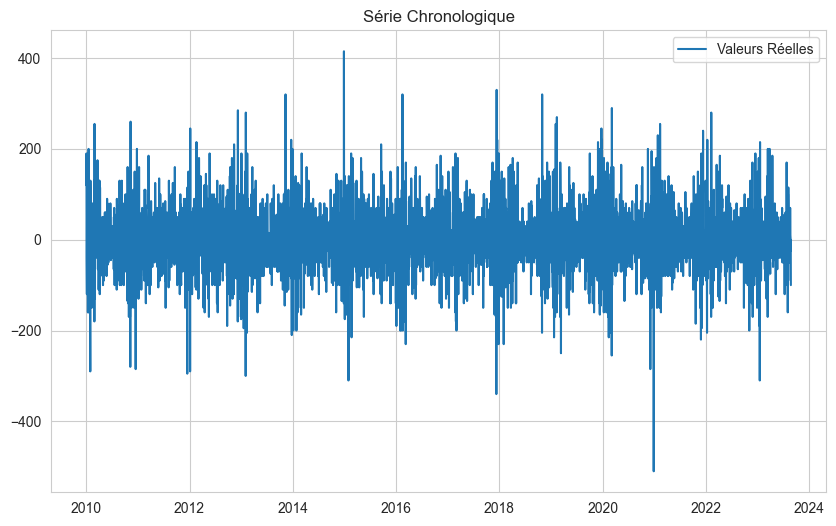

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(variation_pression, label='Valeurs Réelles')
plt.legend()
plt.title('Série Chronologique')
plt.show()

In [82]:
variation_pression

Date
2010-01-01 00:00:00+00:00    120.0
2010-01-02 00:00:00+00:00    190.0
2010-01-03 00:00:00+00:00    -40.0
2010-01-04 00:00:00+00:00    -70.0
2010-01-05 00:00:00+00:00   -120.0
                             ...  
2023-08-20 00:00:00+00:00     10.0
2023-08-21 00:00:00+00:00      5.0
2023-08-22 00:00:00+00:00    -25.0
2023-08-23 00:00:00+00:00      0.0
2023-08-24 00:00:00+00:00   -100.0
Freq: D, Name: Variation de pression en 3 heures, Length: 4984, dtype: float64

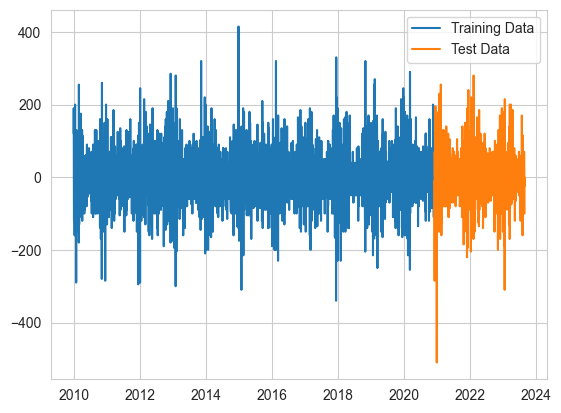

In [87]:
from pmdarima import auto_arima
from datetime import datetime, timedelta

# Diviser les données en ensembles d'entraînement et de test
train_size = int(0.8 * len(variation_pression))
train_data, test_data = variation_pression[:train_size], variation_pression[train_size:]

# Visualisation des données
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.legend()
plt.show()

In [91]:
# [Pression, variation_pression, Direction_vent, Vitesse_vent, point_rose, Humidite, horizontale, station, Rafales]
# Recherche automatique des paramètres ARIMA
model = auto_arima(train_data, seasonal=True, trace=True)

# Entraînement du modèle ARIMA avec les paramètres trouvés
model_fit = model.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44432.805, Time=1.68 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=44714.286, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=44715.210, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=44714.657, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=44712.341, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=44430.804, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=44561.247, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=44491.290, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44432.805, Time=1.67 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=44477.114, Time=0.80 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44433.309, Time=0.90 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=44434.808, Time=1.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=44429.087, Time=0.55 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=44559.339, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0

In [92]:
model_fit.summary

<bound method ARIMA.summary of ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

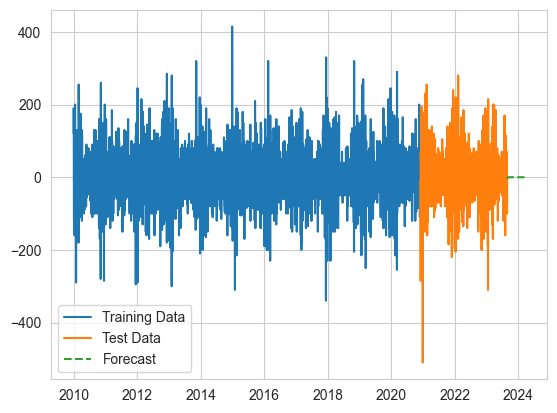

In [95]:
# Prévisions futures
forecast_steps = 200
forecast, conf_int = model_fit.predict(n_periods=forecast_steps, return_conf_int=True)

# Préparation des dates pour les prévisions
last_date = variation_pression.index[-1]
forecast_dates = [last_date + timedelta(days=i) for i in range(1, forecast_steps + 1)]

# Création d'un DataFrame pour les prévisions
forecast_df = pd.DataFrame({'Forecast': list(forecast)}, index=forecast_dates)

# Visualisation des prévisions
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_df, label='Forecast', linestyle='dashed')
plt.legend()
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error

# Chargement des valeurs réelles et prévues
actual_values = test_data
predicted_values = model_fit.predict(n_periods=len(test_data))

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(actual_values, predicted_values, squared=False)
print("RMSE:", rmse)

RMSE: 65.21404317927492


In [98]:
df_cleaned

,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Visibilité horizontale,Temps présent,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures,Température (°C),Latitude,Longitude,Altitude,mois,heure,frozen_id
0,2010-01-05 09:00:00+00:00,100280.0,-50.0,5.0,260.0,1.5,275.75,100.0,4000.0,50.0,91870.0,2.1,0.4,2.6,44.118500,3.019500,712,1,9,0
2,2010-01-06 06:00:00+00:00,100350.0,20.0,3.0,0.0,0.0,261.25,89.0,5000.0,2.0,98900.0,1.0,0.0,-10.6,48.324667,4.020000,112,1,6,1
3,2010-01-06 09:00:00+00:00,100380.0,50.0,3.0,160.0,1.0,264.45,86.0,6000.0,2.0,98950.0,2.1,0.0,-7.0,48.324667,4.020000,112,1,9,1
4,2010-01-06 09:00:00+00:00,100480.0,110.0,3.0,260.0,1.0,265.35,90.0,2500.0,10.0,96180.0,2.1,0.0,-6.6,48.581000,5.959833,336,1,9,1
5,2010-01-07 12:00:00+00:00,101160.0,140.0,0.0,10.0,3.1,271.85,82.0,15000.0,1.0,100830.0,6.2,0.0,1.4,47.150000,-1.608833,26,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215126,2023-03-10 12:00:00+00:00,99910.0,140.0,3.0,240.0,12.4,279.65,83.0,9350.0,60.0,96690.0,23.0,0.6,9.2,47.614333,7.510000,263,3,12,0
215127,2023-03-16 06:00:00+00:00,101680.0,-70.0,7.0,130.0,2.2,272.65,79.0,20000.0,0.0,100210.0,4.2,0.0,2.8,48.324667,4.020000,112,3,6,0
215128,2023-03-27 00:00:00+00:00,101540.0,460.0,1.0,340.0,6.9,276.45,84.0,20000.0,0.0,100370.0,11.1,0.0,5.8,49.209667,4.155333,95,3,0,0
215129,2023-03-28 00:00:00+00:00,102850.0,170.0,1.0,280.0,3.0,272.75,81.0,55420.0,0.0,100950.0,4.1,0.0,2.5,48.549500,7.640333,150,3,0,0


In [149]:
# daily_average['date'] = daily_average['date'].dt.strftime('%Y-%m-%d')

dbx = variation_pression
dbx

Date
2010-01-01 00:00:00+00:00    120.0
2010-01-02 00:00:00+00:00    190.0
2010-01-03 00:00:00+00:00    -40.0
2010-01-04 00:00:00+00:00    -70.0
2010-01-05 00:00:00+00:00   -120.0
                             ...  
2023-08-20 00:00:00+00:00     10.0
2023-08-21 00:00:00+00:00      5.0
2023-08-22 00:00:00+00:00    -25.0
2023-08-23 00:00:00+00:00      0.0
2023-08-24 00:00:00+00:00   -100.0
Freq: D, Name: Variation de pression en 3 heures, Length: 4984, dtype: float64

In [215]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Charger vos données (remplacez 'data.csv' par votre fichier)
data = dbx

# Préparation des données pour le modèle RNN
sequence_length = 30  # Longueur de la séquence d'entrée
sequences = [data[i:i+sequence_length] for i in range(len(data)-sequence_length)]

In [216]:
X = np.array([seq[:-1] for seq in sequences])
y = np.array([seq[-1] for seq in sequences])

In [217]:
# Création du modèle RNN
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length-1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
model.fit(X, y, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
155/155 - 3s - loss: 4160.5894 - 3s/epoch - 18ms/step
Epoch 2/50
155/155 - 2s - loss: 4043.8979 - 2s/epoch - 10ms/step
Epoch 3/50
155/155 - 2s - loss: 3968.1877 - 2s/epoch - 10ms/step
Epoch 4/50
155/155 - 2s - loss: 3951.4912 - 2s/epoch - 10ms/step
Epoch 5/50
155/155 - 2s - loss: 3902.4187 - 2s/epoch - 10ms/step
Epoch 6/50
155/155 - 2s - loss: 3872.7825 - 2s/epoch - 10ms/step
Epoch 7/50
155/155 - 2s - loss: 3982.5601 - 2s/epoch - 10ms/step
Epoch 8/50
155/155 - 2s - loss: 4555.7573 - 2s/epoch - 10ms/step
Epoch 9/50
155/155 - 2s - loss: 4209.8105 - 2s/epoch - 10ms/step
Epoch 10/50
155/155 - 2s - loss: 4196.0107 - 2s/epoch - 10ms/step
Epoch 11/50
155/155 - 2s - loss: 4251.2695 - 2s/epoch - 10ms/step
Epoch 12/50
155/155 - 2s - loss: 4209.9692 - 2s/epoch - 10ms/step
Epoch 13/50
155/155 - 2s - loss: 4225.7412 - 2s/epoch - 10ms/step
Epoch 14/50
155/155 - 2s - loss: 4202.5967 - 2s/epoch - 10ms/step
Epoch 15/50
155/155 - 2s - loss: 4180.4883 - 2s/epoch - 10ms/step
Epoch 16/50
155/155

In [222]:
# Prévision
last_sequence = data[-sequence_length+30:-1].values
print(last_sequence)
forecast = model.predict(last_sequence.reshape(1, sequence_length-30-1, 1))
print("Prévision RNN:", forecast)

[120. 190. -40. ...   5. -25.   0.]
1/1 [==============================] - 0s 477ms/step
Prévision RNN: [[-11345450.]]


In [220]:
dbs = dbx.to_frame()
dbs["date"] = dbs.index
dbs.columns

Index(['Variation de pression en 3 heures', 'date'], dtype='object')

In [211]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, concatenate
from keras.models import Model

# Charger vos données (remplacez 'data.csv' par votre fichier)
data = dbs

# Préparation des données pour le modèle RNN
sequence_length = 30  # Longueur de la séquence d'entrée

# Création de séquences de valeurs et de dates
sequences = [data.iloc[i:i+sequence_length] for i in range(len(data)-sequence_length)]
X_values = np.array([seq['Variation de pression en 3 heures'].values for seq in sequences])
X_dates = np.array([seq['date'].values for seq in sequences])
y = np.array([seq['Variation de pression en 3 heures'].iloc[-1] for seq in sequences])

In [212]:
# Création du modèle RNN avec deux entrées : valeurs et dates
value_input = Input(shape=(sequence_length, 1), name='value_input')
date_input = Input(shape=(sequence_length,), name='date_input')

lstm_out = LSTM(units=50, activation='relu')(value_input)
merged = concatenate([lstm_out, date_input])
output = Dense(1)(merged)

model = Model(inputs=[value_input, date_input], outputs=output)
model.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
model.fit([X_values.reshape(-1, sequence_length, 1), X_dates], y, epochs=50, batch_size=32, verbose=2)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:13                                                                                   │
│                                                                                                  │
│   10 model.compile(optimizer='adam', loss='mse')                                                 │
│   11                                                                                             │
│   12 # Entraînement du modèle                                                                    │
│ ❱ 13 model.fit([X_values.reshape(-1, sequence_length, 1), X_dates], y, epochs=50, batch_size=    │
│   14                                                                                             │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\keras\src\utils\traceback_utils.p │
│ y:70 in error_handler                                                                            │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\tensorflow\python\framework\const │
│ ant_op.py:98 in convert_to_eager_tensor                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: Failed to convert a NumPy array to a Tensor (Unsupported numpy type: NPY_DATETIME).

In [ ]:
# Préparation des données pour la prévision
last_sequence_values = data['Variation de pression en 3 heures'][-sequence_length:].values
last_sequence_dates = data['date'][-sequence_length:].values

# Prévision
forecast = model.predict(np.array([[last_sequence_values, last_sequence_dates]]))
print("Prévision RNN:", forecast)

In [111]:
import pandas as pd
from prophet import Prophet

# Charger vos données (remplacez 'data.csv' par votre fichier)
data = daily_average[["date", "Variation de pression en 3 heures"]]

# Préparation des données pour Prophet
data.rename(columns={'date': 'ds', "Variation de pression en 3 heures": 'y'}, inplace=True)

# Création et ajustement du modèle Prophet
model = Prophet()
model.fit(data)

# Création du DataFrame des dates de prévision
future = model.make_future_dataframe(periods=10)  # Remplacez 10 par le nombre de pas de temps souhaité

# Prévision
forecast = model.predict(future)
print("Prévisions Prophet:", forecast[['ds', 'yhat']].tail(10))


[08/25/23 11:30:52] WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_8292\3875441895.py:8:  ]8;id=603804;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=772649;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               data.rename(columns={'date': 'ds', "Variation de pression en 3                      
                             heures": 'y'}, inplace=True)                                                          
                                                                                                                   

                    DEBUG    cmd: where.exe tbb.dll                                                   ]8;id=366454;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\utils\command.py\command.py]8;;\:]8;id=143651;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\utils\command.py#37\37]8;;\
                             cwd: None                                                                             

                    DEBUG    TBB already found in load path                                            ]8;id=295592;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py\model.py]8;;\:]8;id=750292;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py#233\233]8;;\

                    INFO     Disabling daily seasonality. Run prophet with daily_seasonality=True ]8;id=196555;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\prophet\forecaster.py\forecaster.py]8;;\:]8;id=677129;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\prophet\forecaster.py#931\931]8;;\
                             to override this.                                                                     

                    DEBUG    input tempfile:                                                      ]8;id=644107;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\utils\filesystem.py\filesystem.py]8;;\:]8;id=23057;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\utils\filesystem.py#123\123]8;;\
                             C:\Users\CHERQA~1\AppData\Local\Temp\tmppctpi8o9\ijm9d5ha.json                        

                    DEBUG    input tempfile:                                                      ]8;id=315485;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\utils\filesystem.py\filesystem.py]8;;\:]8;id=137589;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\utils\filesystem.py#123\123]8;;\
                             C:\Users\CHERQA~1\AppData\Local\Temp\tmppctpi8o9\m7bdigsx.json                        

                    DEBUG    idx 0                                                                    ]8;id=732103;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py\model.py]8;;\:]8;id=693888;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py#1677\1677]8;;\

                    DEBUG    running CmdStan, num_threads: None                                       ]8;id=288681;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py\model.py]8;;\:]8;id=372277;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py#1678\1678]8;;\

                    DEBUG    CmdStan args:                                                            ]8;id=672428;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py\model.py]8;;\:]8;id=401326;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py#1690\1690]8;;\
                             ['C:\\Users\\Cherqaoui\\anaconda3\\envs\\test_kedro\\Lib\\site-packages\              
                             \prophet\\stan_model\\prophet_model.bin', 'random', 'seed=27086',                     
                             'data',                                                                               
                             'file=C:\\Users\\CHERQA~1\\AppData\\Local\\Temp\\tmppctpi8o9\\ijm9d5ha.j              
                             son',                                                                                 
                             'init=C:\\Users\\CHERQA~1\\AppData\\Local\\Temp\\tmppctpi8o9\\m7bdigsx.j              
                             son', 'output',                                                                       
                             'file=C:\\Users\\CHERQA~1\\AppData\\Local\\Temp\\tmppctpi8o9\\prophet_mo              
                             del963pa48n\\prophet_model-20230825113052.csv', 'method=optimize',                    
                             'algorithm=lbfgs', 'iter=10000']                                                      

11:30:52 - cmdstanpy - INFO - Chain [1] start processing


                    INFO     Chain [1] start processing                                               ]8;id=212738;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py\model.py]8;;\:]8;id=262048;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py#1693\1693]8;;\

11:30:52 - cmdstanpy - INFO - Chain [1] done processing


                    INFO     Chain [1] done processing                                                ]8;id=674321;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py\model.py]8;;\:]8;id=924447;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py#1750\1750]8;;\

11:30:52 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


                    ERROR    Chain [1] error: terminated by signal 3221225657                         ]8;id=60191;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py\model.py]8;;\:]8;id=31002;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py#1759\1759]8;;\

                    WARNING  Optimization terminated abnormally. Falling back to Newton.               ]8;id=852027;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\prophet\models.py\models.py]8;;\:]8;id=153144;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\prophet\models.py#95\95]8;;\

                    DEBUG    input tempfile:                                                      ]8;id=963049;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\utils\filesystem.py\filesystem.py]8;;\:]8;id=766002;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\utils\filesystem.py#123\123]8;;\
                             C:\Users\CHERQA~1\AppData\Local\Temp\tmppctpi8o9\2ojpn67l.json                        

[08/25/23 11:30:53] DEBUG    input tempfile:                                                      ]8;id=295613;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\utils\filesystem.py\filesystem.py]8;;\:]8;id=349410;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\utils\filesystem.py#123\123]8;;\
                             C:\Users\CHERQA~1\AppData\Local\Temp\tmppctpi8o9\3_g3khuz.json                        

                    DEBUG    idx 0                                                                    ]8;id=186780;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py\model.py]8;;\:]8;id=358445;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py#1677\1677]8;;\

                    DEBUG    running CmdStan, num_threads: None                                       ]8;id=357901;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py\model.py]8;;\:]8;id=880537;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py#1678\1678]8;;\

                    DEBUG    CmdStan args:                                                            ]8;id=576812;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py\model.py]8;;\:]8;id=860773;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py#1690\1690]8;;\
                             ['C:\\Users\\Cherqaoui\\anaconda3\\envs\\test_kedro\\Lib\\site-packages\              
                             \prophet\\stan_model\\prophet_model.bin', 'random', 'seed=8373', 'data',              
                             'file=C:\\Users\\CHERQA~1\\AppData\\Local\\Temp\\tmppctpi8o9\\2ojpn67l.j              
                             son',                                                                                 
                             'init=C:\\Users\\CHERQA~1\\AppData\\Local\\Temp\\tmppctpi8o9\\3_g3khuz.j              
                             son', 'output',                                                                       
                             'file=C:\\Users\\CHERQA~1\\AppData\\Local\\Temp\\tmppctpi8o9\\prophet_mo              
                             delp4t92aws\\prophet_model-20230825113053.csv', 'method=optimize',                    
                             'algorithm=newton', 'iter=10000']                                                     

11:30:53 - cmdstanpy - INFO - Chain [1] start processing


                    INFO     Chain [1] start processing                                               ]8;id=420642;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py\model.py]8;;\:]8;id=795991;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py#1693\1693]8;;\

11:30:53 - cmdstanpy - INFO - Chain [1] done processing


                    INFO     Chain [1] done processing                                                ]8;id=851794;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py\model.py]8;;\:]8;id=676774;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py#1750\1750]8;;\

11:30:53 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


                    ERROR    Chain [1] error: terminated by signal 3221225657                         ]8;id=191463;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py\model.py]8;;\:]8;id=505446;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py#1759\1759]8;;\

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\prophet\models.py:90 in fit       │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py:738 in         │
│ optimize                                                                                         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
RuntimeError: Error during optimization! Command 
'C:\Users\Cherqaoui\anaconda3\envs\test_kedro\Lib\site-packages\prophet\stan_model\prophet_model.bin random 
seed=27086 data file=C:\Users\CHERQA~1\AppData\Local\Temp\tmppctpi8o9\ijm9d5ha.json 
init=C:\Users\CHERQA~1\AppData\Local\Temp\tmppctpi8o9\m7bdigsx.json output 
file=C:\Users\CHERQA~1\AppData\Local\Temp\tmppctpi8o9\prophet_model963pa48n\prophet_model-20230825113052.csv 
method=optimize algorithm=lbfgs iter=10000' failed: 

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:12                                                                                   │
│                                                                                                  │
│    9                                                                                             │
│   10 # Création et ajustement du modèle Prophet                                                  │
│   11 model = Prophet()                                                                           │
│ ❱ 12 model.fit(data)                                                                             │
│   13                                                                                             │
│   14 # Création du DataFrame des dates de prévision                                              │
│   15 future = model.make_future_dataframe(periods=10)  # Remplacez 10 par le nombre de pas de    │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\prophet\forecaster.py:1181 in fit │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\prophet\models.py:97 in fit       │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\cmdstanpy\model.py:738 in         │
│ optimize                                                                                         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
RuntimeError: Error during optimization! Command 
'C:\Users\Cherqaoui\anaconda3\envs\test_kedro\Lib\site-packages\prophet\stan_model\prophet_model.bin random 
seed=8373 data file=C:\Users\CHERQA~1\AppData\Local\Temp\tmppctpi8o9\2ojpn67l.json 
init=C:\Users\CHERQA~1\AppData\Local\Temp\tmppctpi8o9\3_g3khuz.json output 
file=C:\Users\CHERQA~1\AppData\Local\Temp\tmppctpi8o9\prophet_modelp4t92aws\prophet_model-20230825113053.csv 
method=optimize algorithm=newton iter=10000' failed:

In [81]:
predicted_values

2020-12-01 00:00:00+00:00    -4.086888e+00
2020-12-02 00:00:00+00:00    -2.228355e+00
2020-12-03 00:00:00+00:00    -1.339480e+00
2020-12-04 00:00:00+00:00    -8.051708e-01
2020-12-05 00:00:00+00:00    -4.839938e-01
                                 ...      
2023-08-20 00:00:00+00:00   -1.946319e-219
2023-08-21 00:00:00+00:00   -1.169946e-219
2023-08-22 00:00:00+00:00   -7.032629e-220
2023-08-23 00:00:00+00:00   -4.227362e-220
2023-08-24 00:00:00+00:00   -2.541097e-220
Freq: D, Length: 997, dtype: float64

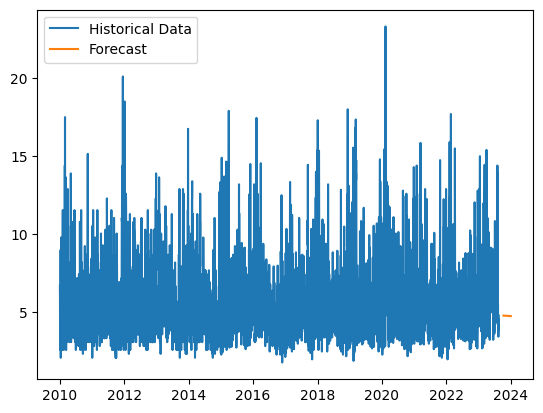

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculer la tendance générale de vos données historiques
historical_trend = daily_average['Rafales sur une période'].diff().mean()

# Générer des dates pour la période de prévision
forecast_dates = pd.date_range(start='2023-10-10', end='2024-01-01', freq='D')

# Prévoir en utilisant la tendance générale comme hypothèse
forecast_values = daily_average['Rafales sur une période'].iloc[-1] + np.cumsum(np.full(len(forecast_dates), historical_trend))

# Créer un DataFrame pour les prévisions
forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=forecast_dates)

# Visualiser les prévisions
plt.plot(daily_average['Rafales sur une période'], label='Historical Data')
plt.plot(forecast_df, label='Forecast')
plt.legend()
plt.show()


In [85]:
forecast_dates

DatetimeIndex(['2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13',
               '2023-10-14', '2023-10-15', '2023-10-16', '2023-10-17',
               '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-21',
               '2023-10-22', '2023-10-23', '2023-10-24', '2023-10-25',
               '2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29',
               '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02',
               '2023-11-03', '2023-11-04', '2023-11-05', '2023-11-06',
               '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10',
               '2023-11-11', '2023-11-12', '2023-11-13', '2023-11-14',
               '2023-11-15', '2023-11-16', '2023-11-17', '2023-11-18',
               '2023-11-19', '2023-11-20', '2023-11-21', '2023-11-22',
               '2023-11-23', '2023-11-24', '2023-11-25', '2023-11-26',
               '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30',
               '2023-12-01', '2023-12-02', '2023-12-03', '2023-12-04',
      

In [83]:
daily_average['Rafales sur une période'].iloc[-1]

4.8

In [82]:
forecast_df

,Forecast
2023-10-10,4.799618
2023-10-11,4.799236
2023-10-12,4.798854
2023-10-13,4.798472
2023-10-14,4.798090
...,...
2023-12-28,4.769447
2023-12-29,4.769065
2023-12-30,4.768683
2023-12-31,4.768302


In [50]:
df_cleaned['Rafales sur une période'].max()

35.8

In [56]:
forecast_df.head(200)

,Forecast
2023-08-17 00:00:00+00:00,5.707960
2023-08-18 00:00:00+00:00,6.062490
2023-08-19 00:00:00+00:00,6.276045
2023-08-20 00:00:00+00:00,6.438911
2023-08-21 00:00:00+00:00,6.434580
...,...
2024-02-28 00:00:00+00:00,6.532489
2024-02-29 00:00:00+00:00,6.532489
2024-03-01 00:00:00+00:00,6.532489
2024-03-02 00:00:00+00:00,6.532489


In [224]:
# Date pour laquelle vous voulez faire une prévision
forecast_date = pd.to_datetime('2024-08-18')  # Remplacez par la date souhaitée

# Prévoir pour la date spécifique
forecast, _ = model_fit.predict(n_periods=1, start=forecast_date, end=forecast_date, return_conf_int=True)

print("Prévision pour la date", forecast_date, ":", forecast[0])

Prévision pour la date 2024-08-18 00:00:00 : 102747.16887655348


In [210]:
forecast

2020-11-24 00:00:00+00:00    102747.168877
Freq: D, dtype: float64

In [50]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Charger vos données dans un DataFrame (df) avec les colonnes 'date', 'longitude', 'latitude', 'humidity'

# Prétraitement des données
# ...

# Sélectionner les données pour une certaine longitude, latitude

# Créer la série temporelle
time_series = df_cleaned.loc[:, ["Date", 'Point de rosée']].set_index('Date')['Point de rosée']

# Entraîner le modèle ARIMA
model = ARIMA(time_series)
model_fit = model.fit()

[08/21/23 16:17:39] WARNING  C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmo ]8;id=889001;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=996728;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             dels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been                   
                             provided, but it has no associated frequency information and so will                  
                             be ignored when e.g. forecasting.                                                     
                               self._init_dates(dates, freq)                                                       
                                                                                                                   

                    WARNING  C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmo ]8;id=59389;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=167794;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             dels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been                   
                             provided, but it is not monotonic and so will be ignored when e.g.                    
                             forecasting.                                                                          
                               self._init_dates(dates, freq)                                                       
                                                                                                                   

                    WARNING  C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmo ]8;id=736548;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=275020;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             dels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been                   
                             provided, but it has no associated frequency information and so will                  
                             be ignored when e.g. forecasting.                                                     
                               self._init_dates(dates, freq)                                                       
                                                                                                                   

                    WARNING  C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmo ]8;id=728605;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=279991;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             dels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been                   
                             provided, but it is not monotonic and so will be ignored when e.g.                    
                             forecasting.                                                                          
                               self._init_dates(dates, freq)                                                       
                                                                                                                   

                    WARNING  C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmo ]8;id=389853;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=444051;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             dels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been                   
                             provided, but it has no associated frequency information and so will                  
                             be ignored when e.g. forecasting.                                                     
                               self._init_dates(dates, freq)                                                       
                                                                                                                   

                    WARNING  C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmo ]8;id=630299;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=792391;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             dels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been                   
                             provided, but it is not monotonic and so will be ignored when e.g.                    
                             forecasting.                                                                          
                               self._init_dates(dates, freq)                                                       
                                                                                                                   

In [79]:
# Date future pour laquelle vous voulez faire une prévision
future_date = pd.to_datetime("2024-10-16 06:00:00+00:00")

# Calculer le nombre de pas de temps entre la dernière observation et la date future
last_date = time_series.index[-1]
forecast_steps = (future_date - last_date).days  # Nombre de jours entre les deux dates
# Générer les prévisions

print("Forecasted dew point:", float(model_fit.forecast(steps=forecast_steps).to_frame().iloc[-1,:]))  # Dernière valeur de la prévision

[08/21/23 16:26:17] WARNING  C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmo ]8;id=316014;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=114502;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             dels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is                   
                             available. Prediction results will be given with an integer index                     
                             beginning at `start`.                                                                 
                               return get_prediction_index(                                                        
                                                                                                                   

                    WARNING  C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmo ]8;id=59321;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=611827;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             dels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is                  
                             available. In the next version, calling this method in a model without                
                             a supported index will result in an exception.                                        
                               return get_prediction_index(                                                        
                                                                                                                   

                    WARNING  C:\Users\Cherqaoui\AppData\Local\Temp\ipykernel_5492\3367454096.py:9:  ]8;id=303221;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=451813;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             FutureWarning: Calling float on a single element Series is deprecated                 
                             and will raise a TypeError in the future. Use float(ser.iloc[0])                      
                             instead                                                                               
                               print("Forecasted dew point:",                                                      
                             float(model_fit.forecast(steps=forecast_steps).to_frame().iloc[-1,:]))                
                             # Dernière valeur de la prévision                                                     
                                                                                                                   

Forecasted dew point: 280.0369293762587


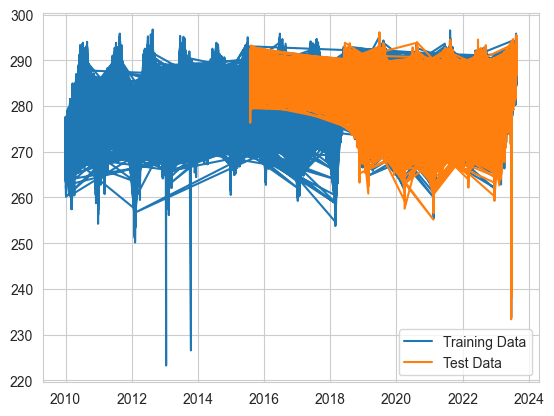

In [80]:
from pmdarima import auto_arima
from datetime import datetime, timedelta

# Charger les données historiques (exemple simplifié)
data = df_cleaned.loc[:, ["Date", 'Point de rosée']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Diviser les données en ensembles d'entraînement et de test
train_size = int(0.8 * len(data))
train_data, test_data = data[:train_size], data[train_size:]

# Visualisation des données
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.legend()
plt.show()

In [81]:
# Recherche automatique des paramètres ARIMA
model = auto_arima(train_data,start_q=2, max_p=3, max_d=2, max_q=3,)

# Entraînement du modèle ARIMA avec les paramètres trouvés
model_fit = model.fit(train_data)

[08/21/23 16:54:23] WARNING  C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmo ]8;id=273478;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=41034;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             dels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is                   
                             available. Prediction results will be given with an integer index                     
                             beginning at `start`.                                                                 
                               return get_prediction_index(                                                        
                                                                                                                   

                    WARNING  C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmo ]8;id=703477;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=780968;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             dels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is                  
                             available. In the next version, calling this method in a model without                
                             a supported index will result in an exception.                                        
                               return get_prediction_index(                                                        
                                                                                                                   

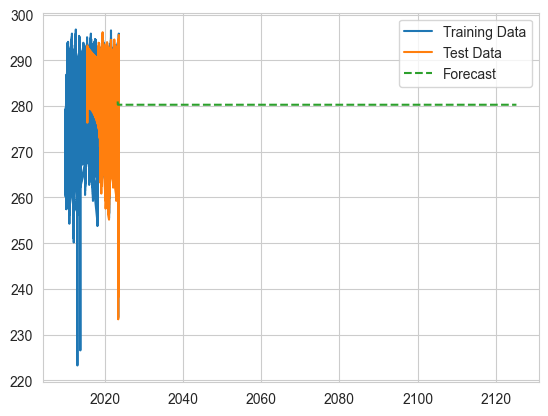

In [95]:
# Prévisions futures
forecast_steps = len(test_data)
forecast, conf_int = model_fit.predict(n_periods=forecast_steps, return_conf_int=True)

# Préparation des dates pour les prévisions
last_date = data.index[-1]
forecast_dates = [last_date + timedelta(days=i) for i in range(1, forecast_steps + 1)]

# Création d'un DataFrame pour les prévisions
forecast_df = pd.DataFrame({'Forecast': list(forecast)}, index=forecast_dates)

# Visualisation des prévisions
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_df, label='Forecast', linestyle='dashed')
plt.legend()
plt.show()

In [97]:
forecast_df

,Forecast
2023-05-02 09:00:00+00:00,281.010977
2023-05-03 09:00:00+00:00,280.536130
2023-05-04 09:00:00+00:00,280.734680
2023-05-05 09:00:00+00:00,280.584784
2023-05-06 09:00:00+00:00,280.509131
...,...
2125-03-13 09:00:00+00:00,280.286583
2125-03-14 09:00:00+00:00,280.286583
2125-03-15 09:00:00+00:00,280.286583
2125-03-16 09:00:00+00:00,280.286583


In [64]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Chargement des données depuis un fichier CSV (adapté à votre format de données)
data = df_cleaned.loc[:, ["Date", 'Point de rosée']]

# Prétraitement des données
# Assurez-vous que vos données contiennent au moins deux colonnes : Date et point de rosée
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Normalisation des données entre 0 et 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Diviser les données en ensembles d'entraînement et de test
train_size = int(len(data) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Création des séquences temporelles et des étiquettes
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

seq_length = 10  # Longueur de la séquence temporelle
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)
num_features = 1
# Construction du modèle RNN
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, num_features), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(num_features)  # Assurez-vous que num_features correspond au nombre de caractéristiques dans vos données
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Évaluation du modèle
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Utilisation du modèle pour une estimation en temps réel
# Vous devrez extraire les dernières données de votre PC et formater la séquence pour effectuer une prédiction

# Exemple d'estimation en temps réel
latest_data = np.array([[0.7, 0.6, 0.5, ...]])  # Remplacez par vos données actuelles
latest_data_scaled = scaler.transform(latest_data)
latest_sequence = latest_data_scaled[-seq_length:]
latest_sequence = np.reshape(latest_sequence, (1, seq_length, num_features))
predicted_scaled = model.predict(latest_sequence)
predicted = scaler.inverse_transform(predicted_scaled)
print(f'Estimated dew point: {predicted[0][0]}')


Epoch 1/50
4651/4651 [==============================] - 56s 11ms/step - loss: 0.0049 - val_loss: 0.0035
Epoch 2/50
4651/4651 [==============================] - 55s 12ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 3/50
4651/4651 [==============================] - 55s 12ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 4/50
4651/4651 [==============================] - 53s 11ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 5/50
4651/4651 [==============================] - 57s 12ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 6/50
4651/4651 [==============================] - 55s 12ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 7/50
4651/4651 [==============================] - 54s 12ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 8/50
4651/4651 [==============================] - 55s 12ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 9/50
4651/4651 [==============================] - 56s 12ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 10/50
4651/4651 [==============================] - 52s 11m

[08/19/23 17:10:08] WARNING  C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\sklearn ]8;id=200928;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=252892;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             \base.py:439: UserWarning: X does not have valid feature names, but                   
                             MinMaxScaler was fitted with feature names                                            
                               warnings.warn(                                                                      
                                                                                                                   

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:65                                                                                   │
│                                                                                                  │
│   62                                                                                             │
│   63 # Exemple d'estimation en temps réel                                                        │
│   64 latest_data = np.array([[0.7, 0.6, 0.5, ...]])  # Remplacez par vos données actuelles       │
│ ❱ 65 latest_data_scaled = scaler.transform(latest_data)                                          │
│   66 latest_sequence = latest_data_scaled[-seq_length:]                                          │
│   67 latest_sequence = np.reshape(latest_sequence, (1, seq_length, num_features))                │
│   68 predicted_scaled = model.predict(latest_sequence)                                           │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\sklearn\utils\_set_output.py:140  │
│ in wrapped                                                                                       │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\sklearn\preprocessing\_data.py:50 │
│ 8 in transform                                                                                   │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\sklearn\base.py:565 in            │
│ _validate_data                                                                                   │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\sklearn\utils\validation.py:879   │
│ in check_array                                                                                   │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\sklearn\utils\_array_api.py:185   │
│ in _asarray_with_order                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: float() argument must be a string or a real number, not 'ellipsis'

In [93]:
forecast_df

,Forecast
2023-05-02 09:00:00+00:00,NaN
2023-05-03 09:00:00+00:00,NaN
2023-05-04 09:00:00+00:00,NaN
2023-05-05 09:00:00+00:00,NaN
2023-05-06 09:00:00+00:00,NaN
...,...
2125-03-13 09:00:00+00:00,NaN
2125-03-14 09:00:00+00:00,NaN
2125-03-15 09:00:00+00:00,NaN
2125-03-16 09:00:00+00:00,NaN


[281.01097737015766,
 280.53612964998945,
 280.73468002809403,
 280.58478360891183,
 280.5091313087271,
 280.46092567659406,
 280.41918594438613,
 280.3878691926479,
 280.36409031135753,
 280.34583099482177,
 280.3318797492352,
 280.32121600782693,
 280.31306167834083,
 280.3068273540363,
 280.3020608960987,
 280.2984166397213,
 280.2956303947065,
 280.29350014828174,
 280.2918714500006,
 280.29062621496405,
 280.2896741599821,
 280.2889462582755,
 280.28838973486006,
 280.2879642401688,
 280.2876389245981,
 280.28739020182286,
 280.2872000387181,
 280.28705464790545,
 280.2869434881281,
 280.2868584999787,
 280.2867935215691,
 280.28674384177566,
 280.2867058586687,
 280.28667681836254,
 280.28665461535047,
 280.2866376398495,
 280.2866246610865,
 280.28661473806324,
 280.28660715133174,
 280.2866013508319,
 280.28659691601064,
 280.2865935253305,
 280.28659093295727,
 280.28658895093633,
 280.2865874355654,
 280.28658627697575,
 280.2865853911662,
 280.28658471391304,
 280.2865841961

In [91]:
# Prévisions futures
forecast_steps = len(test_data)
forecast, conf_int = model_fit.predict(n_periods=forecast_steps, return_conf_int=True)

# Préparation des dates pour les prévisions
last_date = data.index[-1]
forecast_dates = [last_date + timedelta(days=i) for i in range(356)]

# Création d'un DataFrame pour les prévisions
forecast_df = pd.DataFrame({'Forecast': list(forecast)}, index=forecast_dates)

# Visualisation des prévisions
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_df, label='Forecast', linestyle='dashed')
plt.legend()
plt.show()

[08/21/23 16:48:28] WARNING  C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmo ]8;id=112133;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=230774;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             dels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is                   
                             available. Prediction results will be given with an integer index                     
                             beginning at `start`.                                                                 
                               return get_prediction_index(                                                        
                                                                                                                   

                    WARNING  C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\statsmo ]8;id=332094;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py\warnings.py]8;;\:]8;id=740428;file://C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\warnings.py#109\109]8;;\
                             dels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is                  
                             available. In the next version, calling this method in a model without                
                             a supported index will result in an exception.                                        
                               return get_prediction_index(                                                        
                                                                                                                   

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:10                                                                                   │
│                                                                                                  │
│    7 forecast_dates = [last_date + timedelta(days=i) for i in range(356)]                        │
│    8                                                                                             │
│    9 # Création d'un DataFrame pour les prévisions                                               │
│ ❱ 10 forecast_df = pd.DataFrame({'Forecast': list(forecast)}, index=forecast_dates)              │
│   11                                                                                             │
│   12 # Visualisation des prévisions                                                              │
│   13 plt.plot(train_data, label='Training Data')                                                 │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\pandas\core\frame.py:708 in       │
│ __init__                                                                                         │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\pandas\core\internals\constructio │
│ n.py:481 in dict_to_mgr                                                                          │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\pandas\core\internals\constructio │
│ n.py:120 in arrays_to_mgr                                                                        │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\pandas\core\internals\constructio │
│ n.py:608 in _homogenize                                                                          │
│                                                                                                  │
│ C:\Users\Cherqaoui\anaconda3\envs\test_kedro\lib\site-packages\pandas\core\common.py:576 in      │
│ require_length_match                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: Length of values (37210) does not match length of index (356)

In [47]:
df_cleaned["Date"]

1        2010-01-06 06:00:00+00:00
2        2010-01-06 09:00:00+00:00
3        2010-01-06 09:00:00+00:00
4        2010-01-06 15:00:00+00:00
5        2010-01-05 00:00:00+00:00
                    ...           
191266   2023-04-29 09:00:00+00:00
191267   2023-04-29 18:00:00+00:00
191268   2023-05-01 00:00:00+00:00
191269   2023-05-01 03:00:00+00:00
191270   2023-05-01 09:00:00+00:00
Name: Date, Length: 186047, dtype: datetime64[ns, UTC]